**ByteBrains**

---


Project Handled By:
1. Lysa [PM]
2. Fatimah [DA]
3. Faiz [DE]
4. Sanjaya [DS]

# Data Loading

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [ ]:
import gdown
file_ids = {
    "employee_survey_data.csv": "1GuCkw2jukXEqYWfVmZkC-uKdhdsLNGr3",
    "general_data.csv": "15J5zUhJnfwJCgj1kSMgDLef56rCamha_",
    "in_time.csv" : "1aGLGeciC2X0Cajudf23Kf5YZpJ8HNNl0",
    "out_time.csv" : "1Pr90PwKCgj7lCfZq8meDJc0twGoen44R",
    "manager_survey_data.csv" : "19NNR0n3srTh17mBJyH-l_u6GRUOvG9gU"
}
for filename, file_id in file_ids.items():
    gdown.download(f"https://drive.google.com/uc?id={file_id}", filename, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GuCkw2jukXEqYWfVmZkC-uKdhdsLNGr3
To: /content/employee_survey_data.csv
100%|██████████| 52.0k/52.0k [00:00<00:00, 56.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=15J5zUhJnfwJCgj1kSMgDLef56rCamha_
To: /content/general_data.csv
100%|██████████| 550k/550k [00:00<00:00, 8.29MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aGLGeciC2X0Cajudf23Kf5YZpJ8HNNl0
To: /content/in_time.csv
100%|██████████| 23.3M/23.3M [00:00<00:00, 103MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1Pr90PwKCgj7lCfZq8meDJc0twGoen44R
To: /content/out_time.csv
100%|██████████| 23.3M/23.3M [00:00<00:00, 138MB/s]
Downloading...
From: https://drive.google.com/uc?id=19NNR0n3srTh17mBJyH-l_u6GRUOvG9gU
To: /content/manager_survey_data.csv
100%|██████████| 43.0k/43.0k [00:00<00:00, 52.8MB/s]


## Data 1: Employee Data

---
df_survey


In [ ]:
df_survey = pd.read_csv('employee_survey_data.csv')
df_survey.sample(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
2865,2866,3.0,3.0,2.0
430,431,4.0,2.0,4.0
2259,2260,4.0,1.0,3.0
850,851,4.0,1.0,3.0
3446,3447,4.0,2.0,3.0


In [ ]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [ ]:
df_survey.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


In [ ]:
df_survey.isna().sum()

,0
EmployeeID,0
EnvironmentSatisfaction,25
JobSatisfaction,20
WorkLifeBalance,38


A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?

Untuk fitur EnvironmentStatisfaction, JobStatisfaction dan WorkLifeBalance merupakan fitur kategorik.

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

fitur EnvironmentStatisfaction, JobStatisfaction dan WorkLifeBalance

C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

Tidak ada nilai summary yang aneh

## Data 2: General Data

---
df_general


In [ ]:
df_general = pd.read_csv('general_data.csv')
df_general.sample(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
64,32,No,Travel_Rarely,Research & Development,7,3,Technical Degree,1,65,Male,...,7.0,Y,13,8,0,10.0,2,7,0,7
1511,51,No,Travel_Rarely,Research & Development,2,3,Life Sciences,1,1512,Male,...,5.0,Y,13,8,0,13.0,2,4,1,2
1336,31,Yes,Travel_Rarely,Research & Development,2,4,Technical Degree,1,1337,Female,...,4.0,Y,20,8,0,12.0,2,7,7,7
2601,31,No,Travel_Frequently,Research & Development,25,5,Technical Degree,1,2602,Female,...,1.0,Y,14,8,1,10.0,2,10,8,7
3777,33,No,Travel_Rarely,Research & Development,9,3,Medical,1,3778,Female,...,1.0,Y,17,8,0,15.0,3,15,5,7


In [ ]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
df_general.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [ ]:
df_general.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeID,0
Gender,0


A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?
Tidak ada tipe data yang kurang sesuai


B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
NumCompaniesWorked dan TotalWorkingYears

C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)
Tidak ada

## Data 3: Data Absen Masuk


---
df_intime


In [ ]:
df_intime = pd.read_csv('in_time.csv')
df_intime.sample(5)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
2713,2714,NaN,2015-01-02 10:23:45,2015-01-05 10:29:16,2015-01-06 10:01:18,2015-01-07 10:08:59,2015-01-08 10:03:45,2015-01-09 09:44:21,2015-01-12 10:00:20,2015-01-13 10:18:01,...,2015-12-18 10:11:09,2015-12-21 09:52:30,2015-12-22 10:25:27,2015-12-23 09:47:22,2015-12-24 10:09:17,NaN,2015-12-28 09:58:22,2015-12-29 09:37:43,2015-12-30 09:37:11,2015-12-31 09:46:47
1343,1344,NaN,2015-01-02 09:54:48,2015-01-05 10:10:05,2015-01-06 09:28:05,2015-01-07 10:14:40,2015-01-08 09:48:38,NaN,2015-01-12 10:11:02,2015-01-13 09:35:31,...,2015-12-18 09:44:57,2015-12-21 09:49:20,2015-12-22 09:19:23,2015-12-23 10:09:39,2015-12-24 09:45:54,NaN,2015-12-28 09:32:41,2015-12-29 09:47:30,2015-12-30 09:45:41,2015-12-31 09:57:13
590,591,NaN,2015-01-02 10:12:10,2015-01-05 10:05:52,2015-01-06 09:54:07,2015-01-07 10:22:49,2015-01-08 09:32:48,2015-01-09 09:40:02,2015-01-12 10:15:32,2015-01-13 10:14:49,...,2015-12-18 10:00:35,2015-12-21 09:59:24,2015-12-22 10:05:05,2015-12-23 10:00:14,2015-12-24 10:19:30,NaN,2015-12-28 10:14:44,2015-12-29 10:04:02,2015-12-30 09:51:57,2015-12-31 10:09:40
1968,1969,NaN,2015-01-02 09:36:06,2015-01-05 10:00:59,2015-01-06 10:04:04,2015-01-07 10:28:46,2015-01-08 09:43:55,2015-01-09 09:54:41,2015-01-12 09:29:03,2015-01-13 09:59:37,...,2015-12-18 09:55:27,2015-12-21 10:10:43,2015-12-22 10:14:10,2015-12-23 09:43:55,2015-12-24 09:43:48,NaN,2015-12-28 10:11:17,2015-12-29 09:54:57,2015-12-30 09:49:32,2015-12-31 10:12:55
1366,1367,NaN,2015-01-02 10:08:23,2015-01-05 09:22:07,2015-01-06 09:44:29,NaN,2015-01-08 10:04:46,2015-01-09 10:00:10,2015-01-12 09:46:05,2015-01-13 10:12:44,...,2015-12-18 09:50:22,2015-12-21 10:02:40,2015-12-22 09:58:46,2015-12-23 10:15:09,2015-12-24 10:10:39,NaN,2015-12-28 09:53:35,2015-12-29 10:41:17,2015-12-30 09:50:16,2015-12-31 10:09:18


### Mengubah Kolom Pertama dengan EmployeeID

In [ ]:
df_intime = df_intime.rename(columns={'Unnamed: 0': 'EmployeeID'})
df_intime.sample(5)

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
2191,2192,NaN,2015-01-02 10:29:28,2015-01-05 09:29:37,2015-01-06 09:42:23,2015-01-07 09:31:01,2015-01-08 09:29:54,2015-01-09 09:58:39,2015-01-12 09:55:48,2015-01-13 09:54:32,...,2015-12-18 09:38:55,2015-12-21 09:55:04,2015-12-22 09:48:43,2015-12-23 10:04:06,2015-12-24 09:49:09,NaN,2015-12-28 09:29:33,NaN,2015-12-30 10:13:49,2015-12-31 09:52:34
2804,2805,NaN,2015-01-02 09:50:54,2015-01-05 09:54:25,2015-01-06 10:23:07,2015-01-07 10:18:53,2015-01-08 10:33:13,2015-01-09 09:36:36,2015-01-12 10:19:55,2015-01-13 10:06:42,...,2015-12-18 10:17:19,2015-12-21 10:06:12,2015-12-22 09:58:29,2015-12-23 09:42:16,2015-12-24 09:55:33,NaN,2015-12-28 09:36:52,2015-12-29 10:00:50,2015-12-30 10:13:02,2015-12-31 10:04:35
7,8,NaN,2015-01-02 09:57:10,2015-01-05 09:48:56,2015-01-06 09:54:04,2015-01-07 09:52:31,2015-01-08 09:58:31,2015-01-09 09:53:12,2015-01-12 09:58:57,2015-01-13 09:42:05,...,2015-12-18 10:16:27,2015-12-21 10:12:52,2015-12-22 10:58:57,2015-12-23 09:45:12,2015-12-24 09:46:29,NaN,2015-12-28 09:59:24,2015-12-29 09:54:34,2015-12-30 09:43:37,2015-12-31 10:33:00
4067,4068,NaN,2015-01-02 09:17:18,2015-01-05 09:34:28,2015-01-06 10:04:49,2015-01-07 10:16:44,2015-01-08 09:43:25,2015-01-09 10:21:20,2015-01-12 10:03:32,2015-01-13 10:13:13,...,2015-12-18 10:02:56,2015-12-21 09:52:14,2015-12-22 10:39:45,2015-12-23 09:26:27,2015-12-24 10:15:38,NaN,2015-12-28 10:13:51,2015-12-29 10:48:35,2015-12-30 10:37:52,2015-12-31 09:31:17
3137,3138,NaN,2015-01-02 10:16:39,2015-01-05 09:59:20,NaN,2015-01-07 10:09:44,2015-01-08 09:54:01,2015-01-09 09:53:38,2015-01-12 10:01:44,2015-01-13 10:42:18,...,2015-12-18 10:02:44,2015-12-21 09:27:37,2015-12-22 10:03:21,2015-12-23 10:12:36,2015-12-24 10:07:45,NaN,2015-12-28 10:23:48,NaN,2015-12-30 09:54:43,2015-12-31 10:23:42


Insight

---
1. Tanggal 1 itu sepertinya hari libur nasional, karena nilainya NaN
2. Data Absen masuk dan keluar itu hanya terjadi di hari kerja mulai hari senin sampai jumat.


## Data 4: Absen keluar

---
df_outtime


In [ ]:
df_outtime = pd.read_csv('out_time.csv')
df_outtime.sample(5)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
4077,4078,NaN,2015-01-02 20:02:12,2015-01-05 19:47:37,2015-01-06 20:05:49,2015-01-07 21:23:49,2015-01-08 20:44:26,2015-01-09 20:27:46,2015-01-12 20:49:08,2015-01-13 20:11:24,...,2015-12-18 20:47:00,2015-12-21 20:26:00,2015-12-22 20:36:15,2015-12-23 20:37:39,2015-12-24 20:01:53,NaN,2015-12-28 20:51:37,2015-12-29 20:45:36,2015-12-30 20:19:24,2015-12-31 20:14:59
853,854,NaN,2015-01-02 16:34:16,2015-01-05 15:23:12,2015-01-06 16:57:24,2015-01-07 17:13:52,2015-01-08 16:42:52,2015-01-09 16:11:45,2015-01-12 16:09:23,2015-01-13 16:43:18,...,2015-12-18 16:34:28,2015-12-21 16:42:11,2015-12-22 16:27:38,2015-12-23 16:49:13,2015-12-24 16:19:33,NaN,2015-12-28 16:21:32,2015-12-29 17:09:31,2015-12-30 16:17:31,2015-12-31 16:44:05
1448,1449,NaN,2015-01-02 17:07:16,2015-01-05 17:04:37,2015-01-06 17:20:48,NaN,2015-01-08 16:56:36,2015-01-09 16:58:17,2015-01-12 17:11:34,2015-01-13 16:51:03,...,2015-12-18 17:20:01,2015-12-21 17:19:01,2015-12-22 16:53:39,2015-12-23 17:29:07,2015-12-24 16:23:28,NaN,2015-12-28 16:55:42,2015-12-29 17:30:01,2015-12-30 17:34:05,2015-12-31 17:28:02
1797,1798,NaN,2015-01-02 17:21:41,2015-01-05 18:00:30,2015-01-06 18:16:31,2015-01-07 18:16:18,2015-01-08 18:54:03,2015-01-09 17:42:42,2015-01-12 17:38:35,2015-01-13 18:23:28,...,2015-12-18 18:07:54,2015-12-21 17:18:39,2015-12-22 17:58:10,2015-12-23 17:30:27,2015-12-24 17:08:24,NaN,2015-12-28 18:12:32,2015-12-29 18:04:43,2015-12-30 18:08:26,2015-12-31 18:07:55
2999,3000,NaN,NaN,2015-01-05 17:21:43,2015-01-06 18:24:45,2015-01-07 17:17:10,2015-01-08 17:25:59,2015-01-09 17:35:55,2015-01-12 17:17:40,2015-01-13 18:13:19,...,2015-12-18 17:25:04,2015-12-21 18:00:43,2015-12-22 17:22:24,2015-12-23 17:56:35,2015-12-24 17:16:38,NaN,2015-12-28 18:14:18,2015-12-29 18:12:35,2015-12-30 17:24:26,2015-12-31 18:04:19


### Mengubah Kolom Pertama dengan EmployeeID

In [ ]:
df_outtime = df_outtime.rename(columns={'Unnamed: 0': 'EmployeeID'})
df_outtime.sample(5)

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
3032,3033,NaN,2015-01-02 17:42:28,2015-01-05 19:16:39,2015-01-06 18:54:29,2015-01-07 19:23:21,2015-01-08 19:23:39,2015-01-09 17:49:37,2015-01-12 19:05:19,2015-01-13 19:11:58,...,2015-12-18 18:49:28,2015-12-21 18:26:52,2015-12-22 18:39:33,2015-12-23 18:38:25,2015-12-24 18:31:00,NaN,2015-12-28 18:56:22,2015-12-29 19:13:52,2015-12-30 18:59:52,2015-12-31 18:36:42
4216,4217,NaN,2015-01-02 15:37:21,2015-01-05 15:51:19,2015-01-06 16:41:16,2015-01-07 16:27:44,2015-01-08 16:17:21,2015-01-09 16:12:02,2015-01-12 16:11:18,2015-01-13 15:48:39,...,NaN,2015-12-21 15:30:15,2015-12-22 16:13:15,2015-12-23 16:12:34,2015-12-24 15:45:09,NaN,2015-12-28 16:11:41,2015-12-29 16:47:08,2015-12-30 15:53:03,2015-12-31 15:52:25
3503,3504,NaN,2015-01-02 17:05:17,2015-01-05 17:55:51,2015-01-06 16:51:36,2015-01-07 17:29:48,2015-01-08 17:24:31,2015-01-09 17:32:54,2015-01-12 18:16:52,2015-01-13 17:27:08,...,2015-12-18 18:19:45,2015-12-21 17:11:34,2015-12-22 16:54:00,2015-12-23 17:40:35,2015-12-24 17:03:08,NaN,2015-12-28 16:28:37,2015-12-29 17:22:47,2015-12-30 16:26:57,2015-12-31 17:41:15
3178,3179,NaN,2015-01-02 16:40:48,NaN,2015-01-06 16:50:08,2015-01-07 17:54:57,2015-01-08 17:26:25,2015-01-09 16:47:57,2015-01-12 17:17:13,2015-01-13 18:01:59,...,2015-12-18 16:39:28,2015-12-21 17:17:13,2015-12-22 16:54:19,2015-12-23 17:30:36,2015-12-24 16:54:18,NaN,2015-12-28 16:46:40,2015-12-29 16:59:34,2015-12-30 16:35:50,2015-12-31 17:35:49
2238,2239,NaN,2015-01-02 17:01:10,2015-01-05 18:35:15,2015-01-06 17:09:10,2015-01-07 17:16:53,2015-01-08 17:34:59,2015-01-09 17:01:56,2015-01-12 17:30:36,2015-01-13 17:40:19,...,2015-12-18 17:43:08,2015-12-21 17:23:08,2015-12-22 17:47:08,2015-12-23 17:33:30,NaN,NaN,2015-12-28 17:50:32,2015-12-29 17:03:16,2015-12-30 17:30:45,2015-12-31 17:16:55


## Data 5: Manager Data

---
df_managersv


In [ ]:
df_managersv = pd.read_csv('manager_survey_data.csv')
df_managersv.sample(5)

,EmployeeID,JobInvolvement,PerformanceRating
4234,4235,3,3
777,778,3,3
3288,3289,3,3
1762,1763,3,3
83,84,3,3


In [ ]:
df_managersv.shape

(4410, 3)

In [ ]:
df_managersv.isna().sum()

,0
EmployeeID,0
JobInvolvement,0
PerformanceRating,0


# EDA 1


## EDA General Data



### Understanding Data 2

In [ ]:
df_general.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
df_general['PercentSalaryHike'].value_counts()

,count
PercentSalaryHike,
11,630
13,627
14,603
12,594
15,303
18,267
17,246
16,234
19,228


### Column Management Data 2

In [ ]:
df_general['Education'] = df_general['Education'].astype('category')

In [ ]:
df_general.drop(columns=['EmployeeCount', 'Over18'], inplace=True)

In [ ]:
numeric_cols = df_general.select_dtypes(include=np.number).columns
print("Numeric columns:")
numeric_cols

Numeric columns:


Index(['Age', 'DistanceFromHome', 'EmployeeID', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
categorical_cols = df_general.select_dtypes(exclude=np.number).columns
print("\nCategorical columns:")
categorical_cols


Categorical columns:


Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus'],
      dtype='object')

### Univariate Analysis Data 2

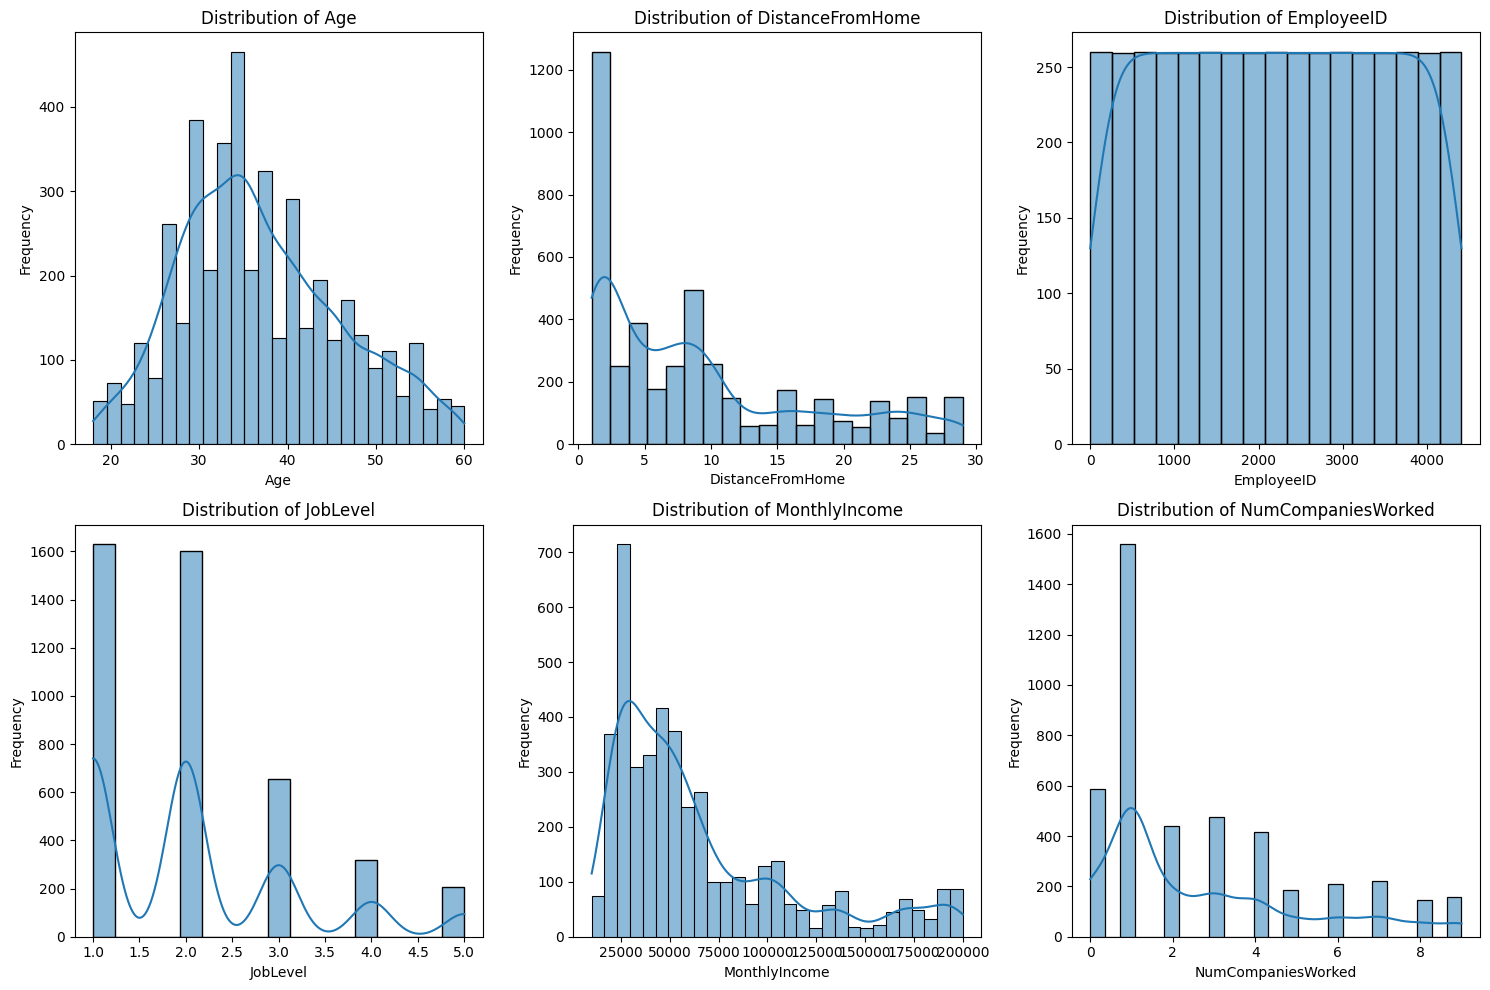

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Ensure numeric_cols does not exceed the number of subplots
for i, col in enumerate(numeric_cols[:len(axes)]):  # Slice to avoid overflow
    sns.histplot(df_general[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Turn off unused subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### Identification Noise Data 2

---

Missing Value, Duplicated Value, Outlier, Unproper Format

In [ ]:
# Identifikasi Missing Value
df_general.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeID,0
Gender,0
JobLevel,0


**Insight**

---
1. Terdapat 2 Kolom yang memiliki missing value
2. Kolom yang hilang yakni TotalWorkingYears dan NumsCompaniesWorked
3. Karena data berupa numeric, imputasi menggunakan median.


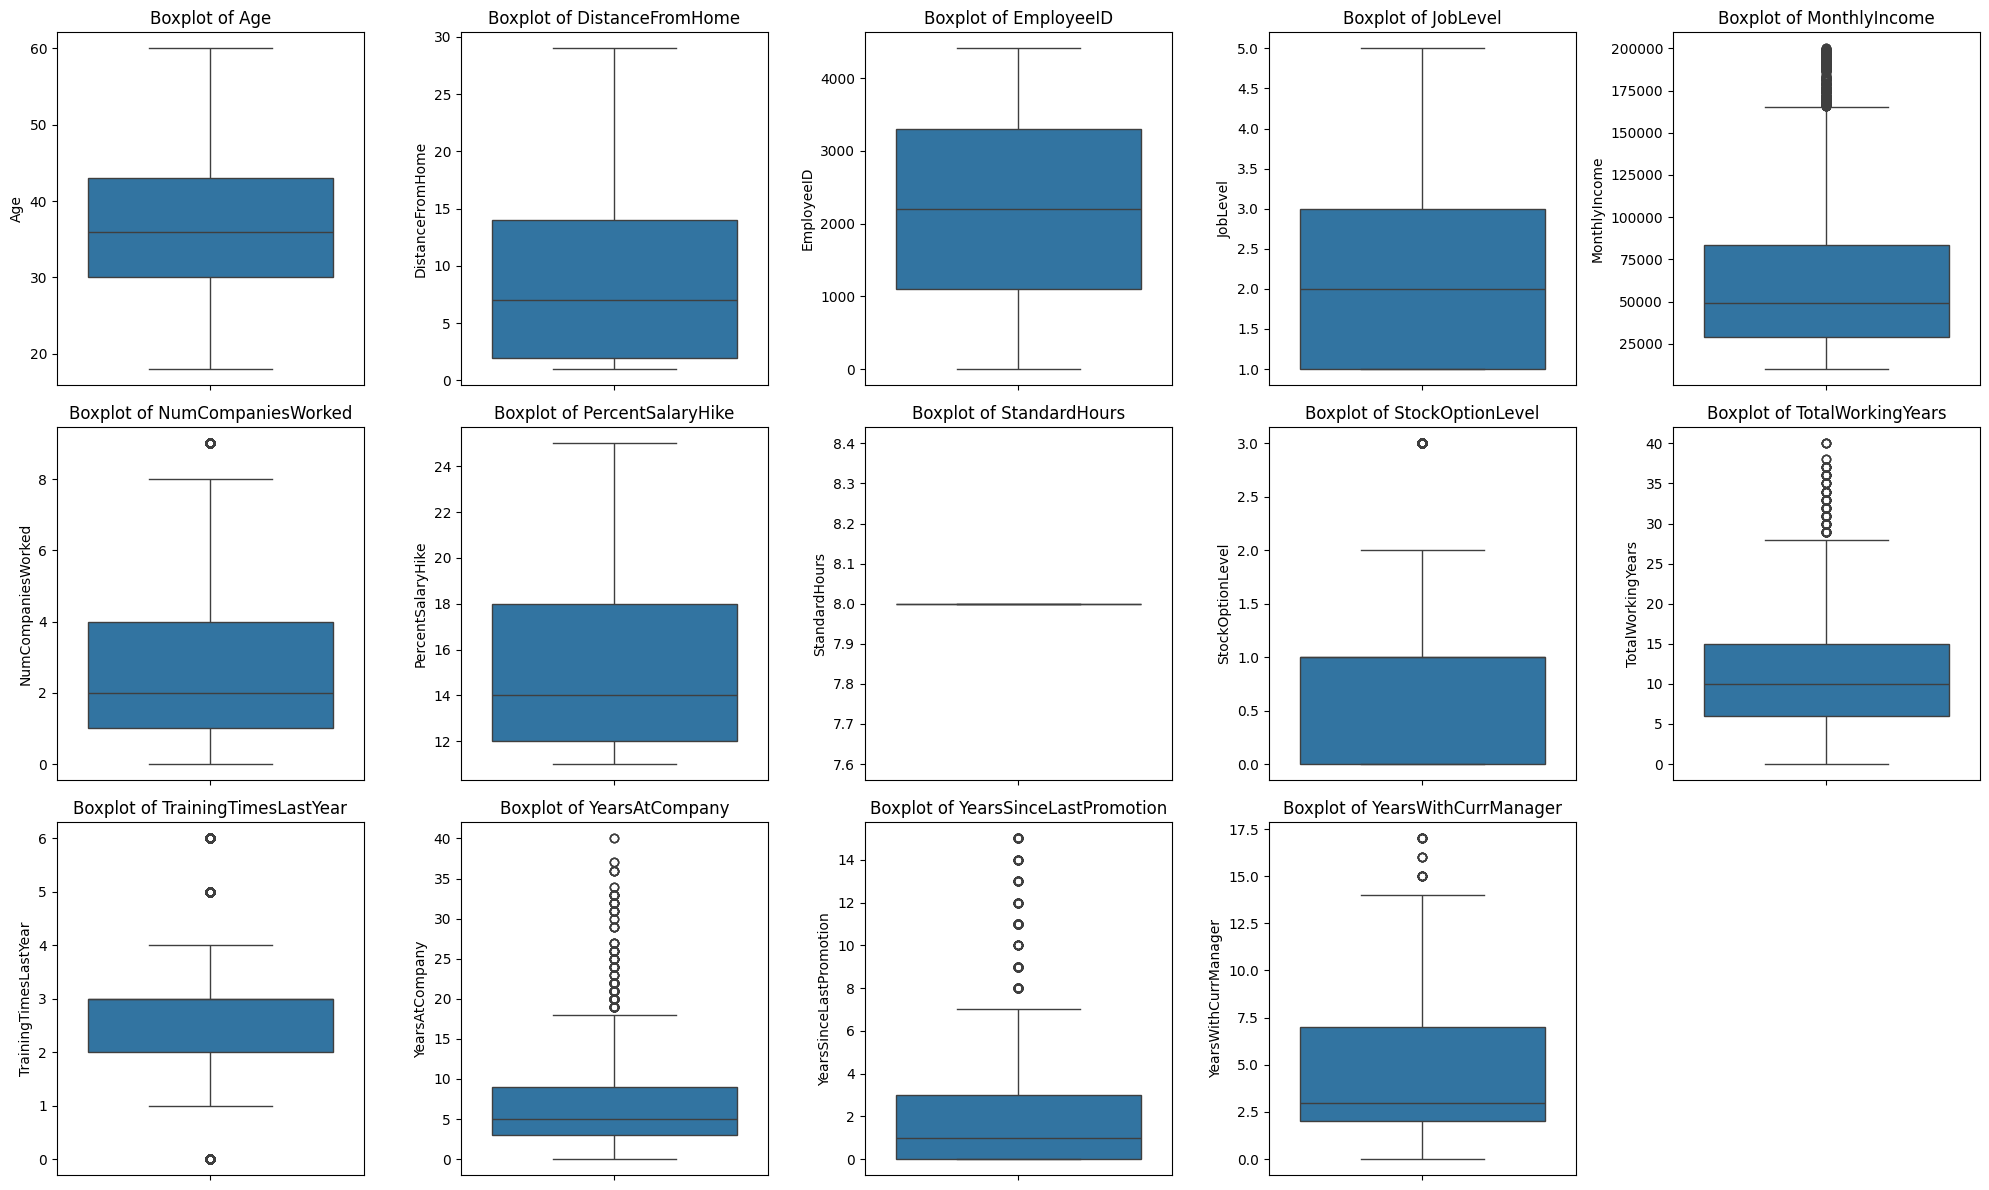

In [ ]:
# Identifikasi Outlier
import matplotlib.pyplot as plt
import seaborn as sns

rows = 3
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df_general, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


**Theory**

---

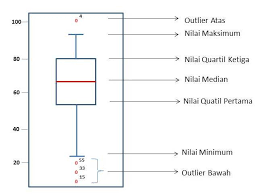

**Insight**

---

1. Terdapat 8 Kolom yang memiliki Outlier
2. Dari 8 Kolom tersebut, perlu dilakukan normalisasi

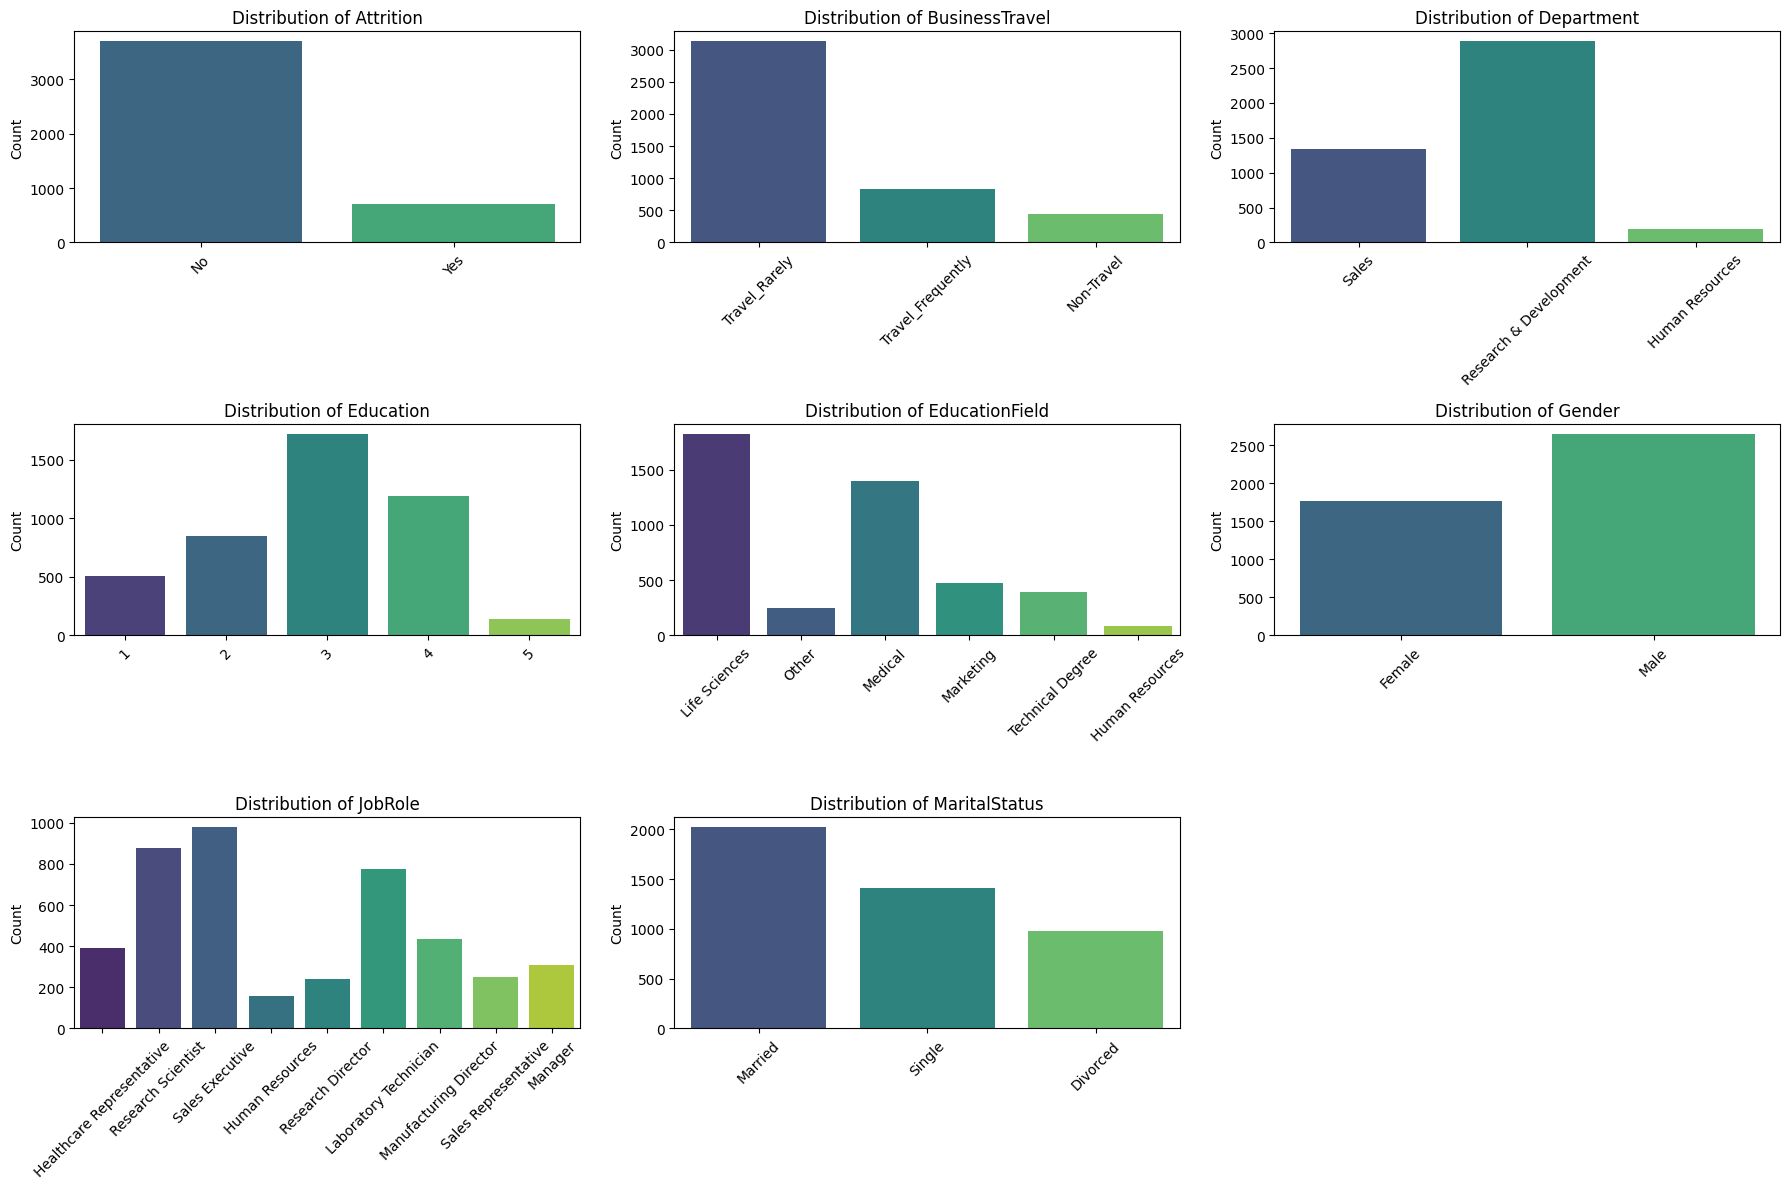

In [ ]:
# Visualisasi Feature Categorical
fig, axes = plt.subplots(3, 3, figsize=(18, 12)) # Membuat kanvas
axes = axes.flatten() # Mengukur Axes

#Mengambil Kolom Kategorikal Menggunakan For Loop
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_general, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

#Menyembunyikan Plot yang tidak digunakan
for j in range(len(categorical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
#Menghitung Jumlah karyawan tiap departemen
df_general['Department'].value_counts()

,count
Department,
Research & Development,2883
Sales,1338
Human Resources,189


## EDA Employee Data

### Understanding Data 1

In [ ]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [ ]:
df_survey.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


### Column Management Data 1

In [ ]:
# Mengubah tipe data ke kategorik
df_survey['EnvironmentSatisfaction'] = df_survey['EnvironmentSatisfaction'].astype('category')
df_survey['JobSatisfaction'] = df_survey['JobSatisfaction'].astype('category')
df_survey['WorkLifeBalance'] = df_survey['WorkLifeBalance'].astype('category')

### Identification Noise Data 1

In [ ]:
#Identifikasi Missiong Value
df_survey.isna().sum()

,0
EmployeeID,0
EnvironmentSatisfaction,25
JobSatisfaction,20
WorkLifeBalance,38


**Insight**

---
1. Dikasih dengan nilai mean
2. Karena data berupa nilai kategorik
3. Dan susunan data ordinal untuk kolom EnvironmentSatisfaction dan JobSatisfaction


In [ ]:
# Check for duplicate rows in df_survey
duplicate_rows = df_survey[df_survey.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Get the number of duplicate rows
num_duplicates = len(duplicate_rows)
print(f"\nNumber of duplicate rows: {num_duplicates}")

Duplicate Rows:
Empty DataFrame
Columns: [EmployeeID, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance]
Index: []

Number of duplicate rows: 0


### Univariate Analysis Data 1

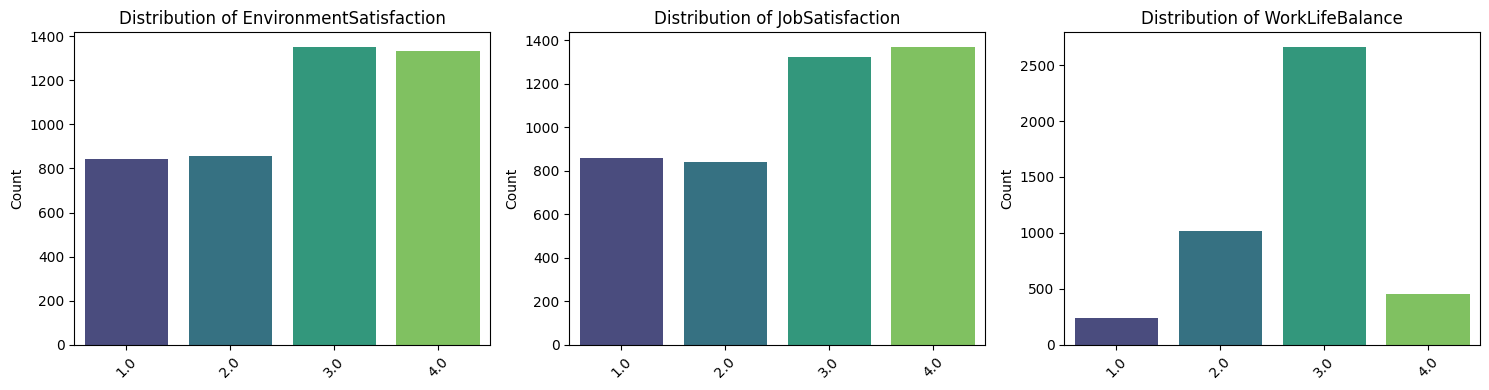

In [ ]:
# Pilih kolom kategori
categorical = df_survey.select_dtypes(exclude=np.number).columns

n_cols = 3
n_rows = -(-len(categorical) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical):
    sns.countplot(data=df_survey, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
for j in range(len(categorical), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

**Insight**

---

1. Banyak karyawan yang tidak puas terhadap lingkungan kerja dan kepuasan kerja.
2. Karyawan merasa kurang yakin terhadap work life balance di pekerjaan tersebut

## EDA Manager Data


### Understanding Data 5

In [ ]:
df_managersv.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


In [ ]:
df_managersv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


### Column Management Data 5

In [ ]:
df_managersv['JobInvolvement'] = df_managersv['JobInvolvement'].astype('category')
df_managersv['PerformanceRating'] = df_managersv['PerformanceRating'].astype('category')

### Univariate Analysis Data 5

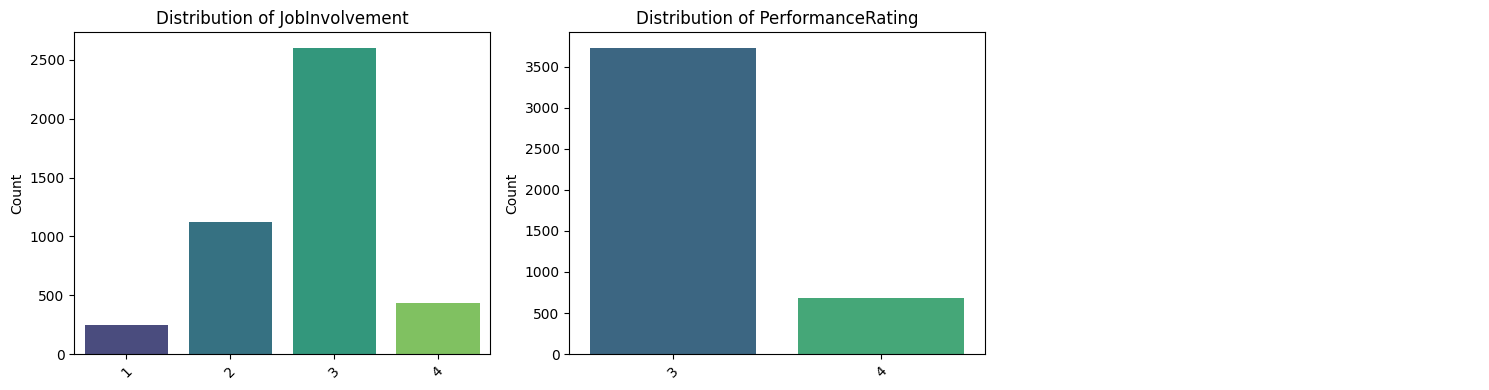

In [ ]:
# Pilih kolom kategori
categorical_columns = df_managersv.select_dtypes(exclude=np.number).columns

n_cols = 3
n_rows = -(-len(categorical_columns) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df_managersv, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
for j in range(len(categorical_columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## EDA Absen Masuk

### Identification Noise Data 3

In [ ]:
# Instead of using sum directly, use it to filter columns first
# then filter rows that are all nulls in the filtered columns.
filtered_cols = df_intime.columns[df_intime.isna().sum() == 4410]
filtered_df = df_intime[filtered_cols][df_intime[filtered_cols].isnull().all(axis=1)]

# Display the filtered DataFrame
filtered_df

,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Insight

---

1. Karena ada 12 hari libur yang mana karyawan tidak masuk. Maka kolom tersebut akan di drop.
2. Kenapa di drop, karena pada dataset absen masuk dan keluar kolom tersebut bernilai NaN.

In [ ]:
# Menghapus kolom yang seluruhnya null
df_intime_dropped_cols = df_intime.drop(columns=filtered_cols)

# Menghapus baris yang seluruhnya null di kolom yang tersisa
df1_intime = df_intime_dropped_cols.dropna(how='all')

In [ ]:
# Mengambil semua kolom kecuali 'EmployeeID'
weekday_columns = df1_intime.columns[1:]  # Mengambil semua kolom setelah EmployeeID

# Menghitung jumlah kehadiran (non-NaN) per karyawan
attendance = df1_intime[weekday_columns].notna().sum(axis=1)

# Menghitung jumlah alpa (NaN) per karyawan
absence = df1_intime[weekday_columns].isna().sum(axis=1)

# Menghitung tingkat kehadiran
attendance_rate = attendance / len(weekday_columns)

# Menghitung tingkat alpa
alpha_rate = absence / len(weekday_columns)

# Menyusun hasil dalam DataFrame baru
result = pd.DataFrame({
    'EmployeeID': df1_intime['EmployeeID'],
    'Attendance Count': attendance,
    'Absence Count': absence,
    'Attendance Rate': attendance_rate,
    'Alpha Rate': alpha_rate
})

# Menampilkan DataFrame hasil
print(result)

      EmployeeID  Attendance Count  Absence Count  Attendance Rate  Alpha Rate
0              1               232             17         0.931727    0.068273
1              2               236             13         0.947791    0.052209
2              3               242              7         0.971888    0.028112
3              4               235             14         0.943775    0.056225
4              5               245              4         0.983936    0.016064
...          ...               ...            ...              ...         ...
4405        4406               243              6         0.975904    0.024096
4406        4407               241              8         0.967871    0.032129
4407        4408               231             18         0.927711    0.072289
4408        4409               241              8         0.967871    0.032129
4409        4410               232             17         0.931727    0.068273

[4410 rows x 5 columns]


## EDA Absen Keluar

### Identification Noise Data 4

In [ ]:
# Instead of using sum directly, use it to filter columns first
# then filter rows that are all nulls in the filtered columns.
filtered_cols = df_outtime.columns[df_outtime.isna().sum() == 4410]
filtered_df = df_outtime[filtered_cols][df_outtime[filtered_cols].isnull().all(axis=1)]

# Display the filtered DataFrame
filtered_df

,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Menghapus kolom yang seluruhnya null
df_outtime_dropped_cols = df_outtime.drop(columns=filtered_cols)

# Menghapus baris yang seluruhnya null di kolom yang tersisa
df1_outtime = df_outtime_dropped_cols.dropna(how='all')

In [ ]:
# Mengambil semua kolom kecuali 'EmployeeID'
weekday_columns = df1_outtime.columns[1:]  # Mengambil semua kolom setelah EmployeeID

# Menghitung jumlah kehadiran (non-NaN) per karyawan
attendance = df1_outtime[weekday_columns].notna().sum(axis=1)

# Menghitung jumlah alpa (NaN) per karyawan
absence = df1_outtime[weekday_columns].isna().sum(axis=1)

# Menghitung tingkat kehadiran
attendance_rate = attendance / len(weekday_columns)

# Menghitung tingkat alpa
alpha_rate = absence / len(weekday_columns)

# Menyusun hasil dalam DataFrame baru
result = pd.DataFrame({
    'EmployeeID': df1_outtime['EmployeeID'],
    'Attendance Count': attendance,
    'Absence Count': absence,
    'Attendance Rate': attendance_rate,
    'Alpha Rate': alpha_rate
})

# Menampilkan DataFrame hasil
print(result)

      EmployeeID  Attendance Count  Absence Count  Attendance Rate  Alpha Rate
0              1               232             17         0.931727    0.068273
1              2               236             13         0.947791    0.052209
2              3               242              7         0.971888    0.028112
3              4               235             14         0.943775    0.056225
4              5               245              4         0.983936    0.016064
...          ...               ...            ...              ...         ...
4405        4406               243              6         0.975904    0.024096
4406        4407               241              8         0.967871    0.032129
4407        4408               231             18         0.927711    0.072289
4408        4409               241              8         0.967871    0.032129
4409        4410               232             17         0.931727    0.068273

[4410 rows x 5 columns]


##EDA Absensi

In [ ]:
# Cek types data
df1_intime.dtypes
df1_outtime.dtypes

,0
EmployeeID,int64
2015-01-02,object
2015-01-05,object
2015-01-06,object
2015-01-07,object
...,...
2015-12-24,object
2015-12-28,object
2015-12-29,object
2015-12-30,object


###Durations

In [ ]:
# Convert date columns to datetime objects, excluding the 'EmployeeID' column
for col in df1_intime.columns[1:]:  # Select columns after 'EmployeeID'
    df1_intime[col] = pd.to_datetime(df1_intime[col], errors='coerce', format='%Y-%m-%d %H:%M:%S')

# Repeat the same for df4_outtime
for col in df1_outtime.columns[1:]:
    df1_outtime[col] = pd.to_datetime(df1_outtime[col], errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [ ]:
#Create a new dataframe to store durations
durations = pd.DataFrame()

# Calculate the duration for each employee
for employee_id in df1_intime['EmployeeID']:
    intime = df1_intime[df1_intime['EmployeeID'] == employee_id].iloc[:, 1:]
    outtime = df1_outtime[df1_outtime['EmployeeID'] == employee_id].iloc[:, 1:]

    # Calculate the duration
    duration = outtime.subtract(intime)

    # Convert duration to hours and minutes
    duration_hours_minutes = duration.applymap(lambda x: f"{x.components.hours}h {x.components.minutes}m" if pd.notnull(x) else "NaN")

    # Store results with EmployeeID
    duration_hours_minutes.insert(0, 'EmployeeID', employee_id)
    durations = pd.concat([durations, duration_hours_minutes], ignore_index=True)

# Display the durations dataframe
print(durations)

      EmployeeID 2015-01-02 2015-01-05 2015-01-06 2015-01-07 2015-01-08  \
0              1     7h 12m     7h 11m     7h 24m      7h 0m     7h 17m   
1              2      8h 6m     7h 27m        NaN     7h 23m     7h 25m   
2              3     6h 41m     7h 15m     6h 24m     6h 45m     7h 20m   
3              4     7h 20m     7h 17m     6h 56m     6h 55m     6h 51m   
4              5      8h 3m     7h 59m     7h 40m     7h 48m     7h 39m   
...          ...        ...        ...        ...        ...        ...   
4405        4406      8h 7m     8h 50m     8h 23m     8h 50m     8h 13m   
4406        4407     6h 15m        NaN     5h 23m     5h 43m     6h 11m   
4407        4408     7h 16m     7h 35m     7h 38m     7h 59m     7h 17m   
4408        4409     9h 31m     9h 35m     9h 47m     9h 23m     9h 12m   
4409        4410     6h 50m     7h 16m     6h 43m     6h 50m     7h 25m   

     2015-01-09 2015-01-12 2015-01-13 2015-01-15  ... 2015-12-17 2015-12-18  \
0        7h 29m     

Total Kehadiran: 1041930
Total Ketidakhadiran: 60570
Persentase Kehadiran: 94.51%
Persentase Ketidakhadiran: 5.49%


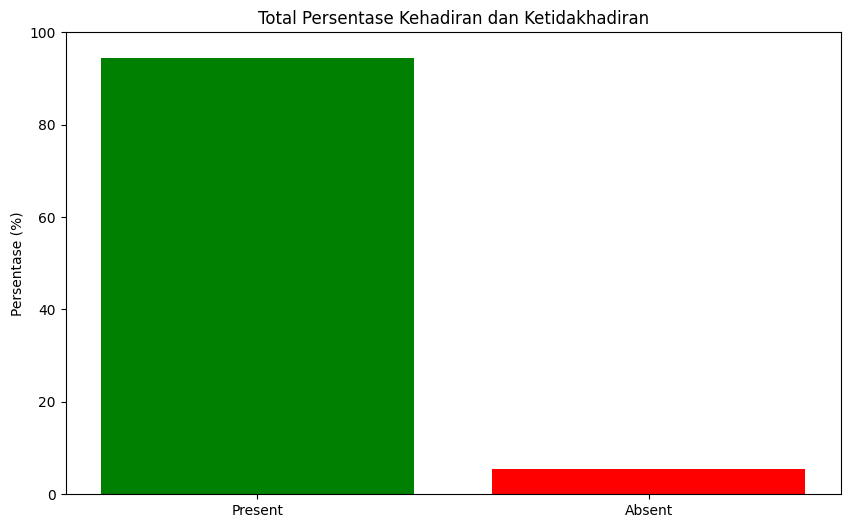

In [ ]:
# Fungsi untuk mengubah waktu dalam format menjadi menit
def time_to_minutes(time_str):
    try:
        hours, minutes = map(int, time_str.replace('h', '').replace('m', '').split())
        return hours * 60 + minutes
    except:
        return None  # Untuk nilai NaN atau format tidak valid

# Mengubah semua kolom ke waktu dalam menit
attendance_in_minutes = durations.applymap(time_to_minutes)

# Menghitung total kehadiran dan ketidakhadiran
total_days = attendance_in_minutes.shape[1]  # Total hari dalam dataset
total_records = attendance_in_minutes.size  # Total data dalam dataset
total_present = attendance_in_minutes.notna().sum().sum()  # Total kehadiran
total_absent = total_records - total_present  # Total ketidakhadiran

# Menghitung persentase
percent_present = (total_present / total_records) * 100
percent_absent = 100 - percent_present

# Menampilkan hasil
print(f"Total Kehadiran: {total_present}")
print(f"Total Ketidakhadiran: {total_absent}")
print(f"Persentase Kehadiran: {percent_present:.2f}%")
print(f"Persentase Ketidakhadiran: {percent_absent:.2f}%")

# Plot grafik persentase kehadiran dan ketidakhadiran
plt.figure(figsize=(10, 6))
plt.bar(['Present', 'Absent'], [percent_present, percent_absent], color=['green', 'red'])
plt.title('Total Persentase Kehadiran dan Ketidakhadiran')
plt.ylabel('Persentase (%)')
plt.ylim(0, 100)
plt.show()


Total Kehadiran: 1041930
Total Hari Overtime: 331759
Persentase Overtime: 31.84%


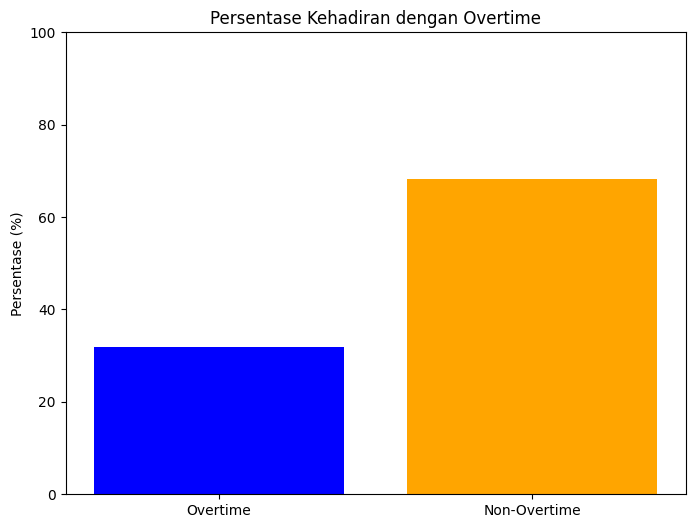

In [ ]:
# Fungsi untuk mengubah waktu dalam format menjadi menit
def time_to_minutes(time_str):
    try:
        hours, minutes = map(int, time_str.replace('h', '').replace('m', '').split())
        return hours * 60 + minutes
    except:
        return None  # Untuk nilai NaN atau format tidak valid

# Mengubah semua kolom ke waktu dalam menit
attendance_in_minutes = durations.applymap(time_to_minutes)

# Definisikan batas overtime (480 menit = 8 jam)
overtime_limit = 480

# Menghitung jumlah hari overtime untuk setiap karyawan
overtime_days = attendance_in_minutes[attendance_in_minutes > overtime_limit].count().sum()

# Total kehadiran
total_present_days = attendance_in_minutes.notna().sum().sum()

# Menghitung persentase overtime
percent_overtime = (overtime_days / total_present_days) * 100

# Menampilkan hasil
print(f"Total Kehadiran: {total_present_days}")
print(f"Total Hari Overtime: {overtime_days}")
print(f"Persentase Overtime: {percent_overtime:.2f}%")

# Plot grafik persentase overtime
plt.figure(figsize=(8, 6))
plt.bar(['Overtime', 'Non-Overtime'], [percent_overtime, 100 - percent_overtime], color=['blue', 'orange'])
plt.title('Persentase Kehadiran dengan Overtime')
plt.ylabel('Persentase (%)')
plt.ylim(0, 100)
plt.show()

###Absence

In [ ]:
import re

# Unpivot (melt) data dari wide format ke long format
df_melted = durations.melt(id_vars=["EmployeeID"], var_name="Date", value_name="Work_Hours")

# Fungsi untuk mengonversi "7h 30m" menjadi format desimal
def convert_time_format(time_str):
    if pd.isna(time_str):
        return np.nan
    match = re.match(r"(\d+)h (\d+)m", time_str)
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2))
        return hours + (minutes / 60)
    return np.nan

# Terapkan konversi ke kolom Work_Hours
df_melted["Work_Hours"] = df_melted["Work_Hours"].apply(convert_time_format)

# Konversi kolom Date menjadi tipe datetime
df_melted["Date"] = pd.to_datetime(df_melted["Date"])

# Tambahkan fitur tambahan
df_melted["Week"] = df_melted["Date"].dt.isocalendar().week  # Minggu ke-
df_melted["Month"] = df_melted["Date"].dt.month  # Bulan ke-
df_melted["Year"] = df_melted["Date"].dt.year  # Tahun

# Agregasi fitur tambahan
df_absence = df_melted.groupby("EmployeeID").agg(
    total_hours_per_year=("Work_Hours", "sum"),
    avg_hours_per_day=("Work_Hours", "mean"),
    max_hours_per_day=("Work_Hours", "max"),
    min_hours_per_day=("Work_Hours", "min"),
    presence_days=("Work_Hours", "count")  # Jumlah hari hadir
).reset_index()

# Tambahkan fitur overtime
df_absence["Overtime"] = df_absence["avg_hours_per_day"] > 8

In [ ]:
display(df_absence)

,EmployeeID,total_hours_per_year,avg_hours_per_day,max_hours_per_day,min_hours_per_day,presence_days,Overtime
0,1,1708.816667,7.365589,7.933333,6.500000,232,False
1,2,1819.783333,7.710946,8.550000,6.716667,236,False
2,3,1695.183333,7.004890,7.983333,6.183333,242,False
3,4,1688.533333,7.185248,7.883333,6.266667,235,False
4,5,1959.550000,7.998163,8.816667,7.300000,245,False
...,...,...,...,...,...,...,...
4405,4406,2068.866667,8.513855,9.400000,7.750000,243,True
4406,4407,1466.333333,6.084371,6.800000,5.216667,241,False
4407,4408,1778.266667,7.698124,8.466667,6.850000,231,False
4408,4409,2285.750000,9.484440,10.300000,8.616667,241,True


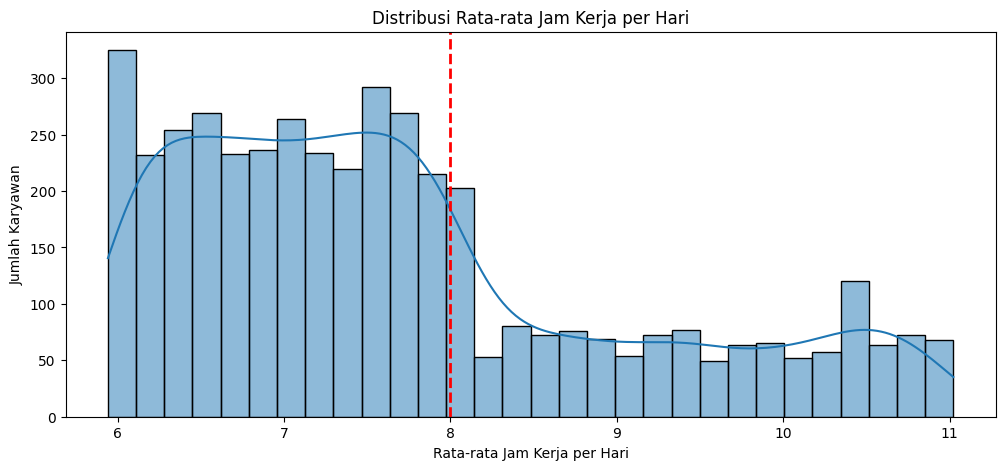

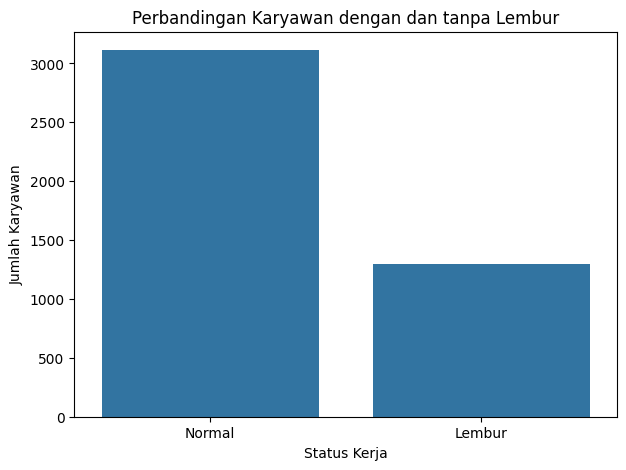

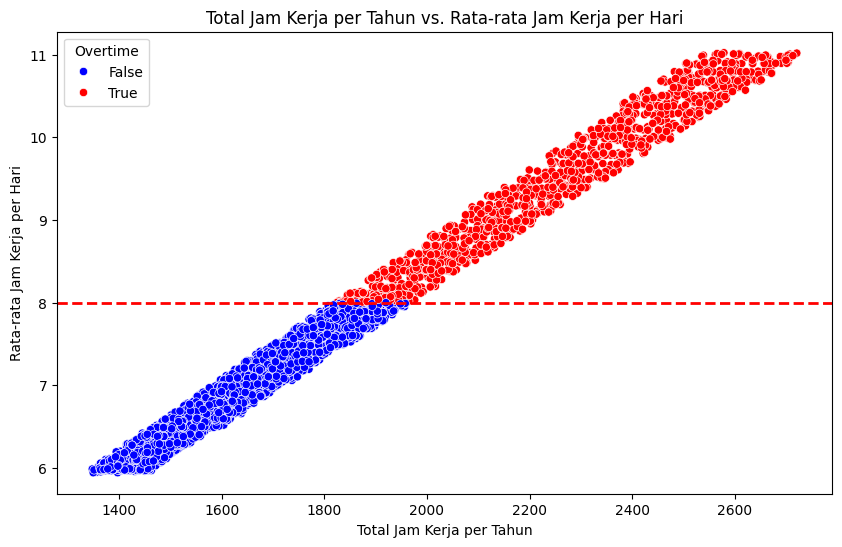

In [ ]:
# Visualisasi
plt.figure(figsize=(12, 5))
sns.histplot(df_absence["avg_hours_per_day"], bins=30, kde=True)
plt.axvline(8, color='r', linestyle='dashed', linewidth=2)
plt.title("Distribusi Rata-rata Jam Kerja per Hari")
plt.xlabel("Rata-rata Jam Kerja per Hari")
plt.ylabel("Jumlah Karyawan")
plt.show()

plt.figure(figsize=(7, 5))
sns.countplot(x=df_absence["Overtime"].map({True: 'Lembur', False: 'Normal'}))
plt.title("Perbandingan Karyawan dengan dan tanpa Lembur")
plt.xlabel("Status Kerja")
plt.ylabel("Jumlah Karyawan")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_absence["total_hours_per_year"], y=df_absence["avg_hours_per_day"], hue=df_absence["Overtime"], palette={True: "red", False: "blue"})
plt.axhline(8, color='r', linestyle='dashed', linewidth=2)
plt.title("Total Jam Kerja per Tahun vs. Rata-rata Jam Kerja per Hari")
plt.xlabel("Total Jam Kerja per Tahun")
plt.ylabel("Rata-rata Jam Kerja per Hari")
plt.show()


Hal menarik :


---


1. years since last promotion memiliki korelasi dengan age tetapi tidak memiliki korelasi dengan attrition
2. environment satisfaction, job satisfaction, dan marital status hanya memiliki korelasi dengan attrition saja
3. age memiliki korelasi dengan total working years, years at company, years with current manager, years since last promotion, marital status, attition
4. performance rating memiliki korelasi yang kuat dengan percent salary hike. artinya karyawan yang memiliki persentase kenaikan gaji yang tinggi adalah karyawan yang memiliki performa yang baik.
5. Hanya 1 : 5 karyawan yang memiliki rating performa sangat tinggi. sisanya hanya tinggi saja.
6. 1 dari 3 karyawan memiliki tingkat kepuasan  yang rendah atau medium pada lingkungan dan pekerjaan
7. 50% karyawan berada di perusahaan ini selama kurang atau sama dengan 5 tahun, 25% 5-10 tahun, dan sisanya di atas 10 tahun
8. 50% karyawan memiliki total working years kurang dari atau sama dengan 10 tahun
9. 50% karyawan berada dalam job level kurang dari atau sama dengan 2
10. 50% karyawan memiliki monthly income kurang dari rata-rata.

# merge data

In [ ]:
# Now merge the rest of the dataframes with the combined absence data
# Menggabungkan df_absence dengan df_general
merged_df = pd.merge(df_general, df_absence, on='EmployeeID', how='outer')

# Menggabungkan hasil dengan df_survey
merged_df = pd.merge(merged_df, df_survey, on='EmployeeID', how='outer')

# Menggabungkan hasil dengan df_managersv
merged_df = pd.merge(merged_df, df_managersv, on='EmployeeID', how='outer')

**Merging Data: Outer**

---
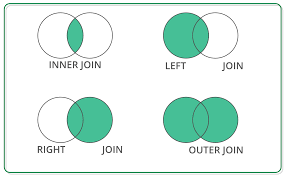


# Data Preprocessing

In [ ]:
merged_df.describe()

,Age,DistanceFromHome,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,total_hours_per_year,avg_hours_per_day,max_hours_per_day,min_hours_per_day,presence_days
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,1819.341508,7.692603,8.532011,6.852899,236.265306
std,9.133301,8.105026,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,331.344007,1.340213,1.342780,1.347934,5.503779
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1346.983333,5.942070,6.566667,4.716667,225.000000
25%,30.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,1561.675000,6.665046,7.500000,5.800000,232.000000
50%,36.000000,7.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,1743.900000,7.398591,8.250000,6.575000,236.000000
75%,43.000000,14.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,1965.245833,8.360342,9.183333,7.479167,241.000000
max,60.000000,29.000000,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,2721.466667,11.022792,12.083333,10.283333,248.000000


In [ ]:
merged_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'total_hours_per_year', 'avg_hours_per_day', 'max_hours_per_day',
       'min_hours_per_day', 'presence_days', 'Overtime',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

### Drop Unuseful Data

In [ ]:
df_new = merged_df.drop(['EmployeeID', 'StandardHours','max_hours_per_day', 'min_hours_per_day'], axis='columns')

In [ ]:
nums = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager','presence_days']
cats = ['Education', 'JobLevel', 'StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
        'PerformanceRating', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Overtime' ]

### Handling Missing Value

In [ ]:
df_new.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
Gender,0
JobLevel,0
JobRole,0


Berdasarkan EDA tahap 1 berikut variabel yang missing value.

---
1. EnvironmentSatisfaction
2. JobSatisfaction
3. WorkLifeBalance
4. NumCompaniesWorked
5. TotalWorkingYears


In [ ]:
df_new['NumCompaniesWorked'].fillna(merged_df['NumCompaniesWorked'].median(), inplace=True)
df_new['TotalWorkingYears'].fillna(merged_df['TotalWorkingYears'].median(), inplace=True)
df_new['EnvironmentSatisfaction'].fillna(merged_df['EnvironmentSatisfaction'].mode(), inplace=True)
df_new['JobSatisfaction'].fillna(merged_df['JobSatisfaction'].mode(), inplace=True)
df_new['WorkLifeBalance'].fillna(merged_df['WorkLifeBalance'].mode(), inplace=True)

In [ ]:
df_new['NumCompaniesWorked'].isna()
merged_df['TotalWorkingYears'].isna()
merged_df['EnvironmentSatisfaction'].isna()
merged_df['JobSatisfaction'].isna()
merged_df['WorkLifeBalance'].isna()

,WorkLifeBalance
0,False
1,False
2,False
3,False
4,False
...,...
4405,False
4406,False
4407,False
4408,False


## Univariate Analysis

### View Outlier

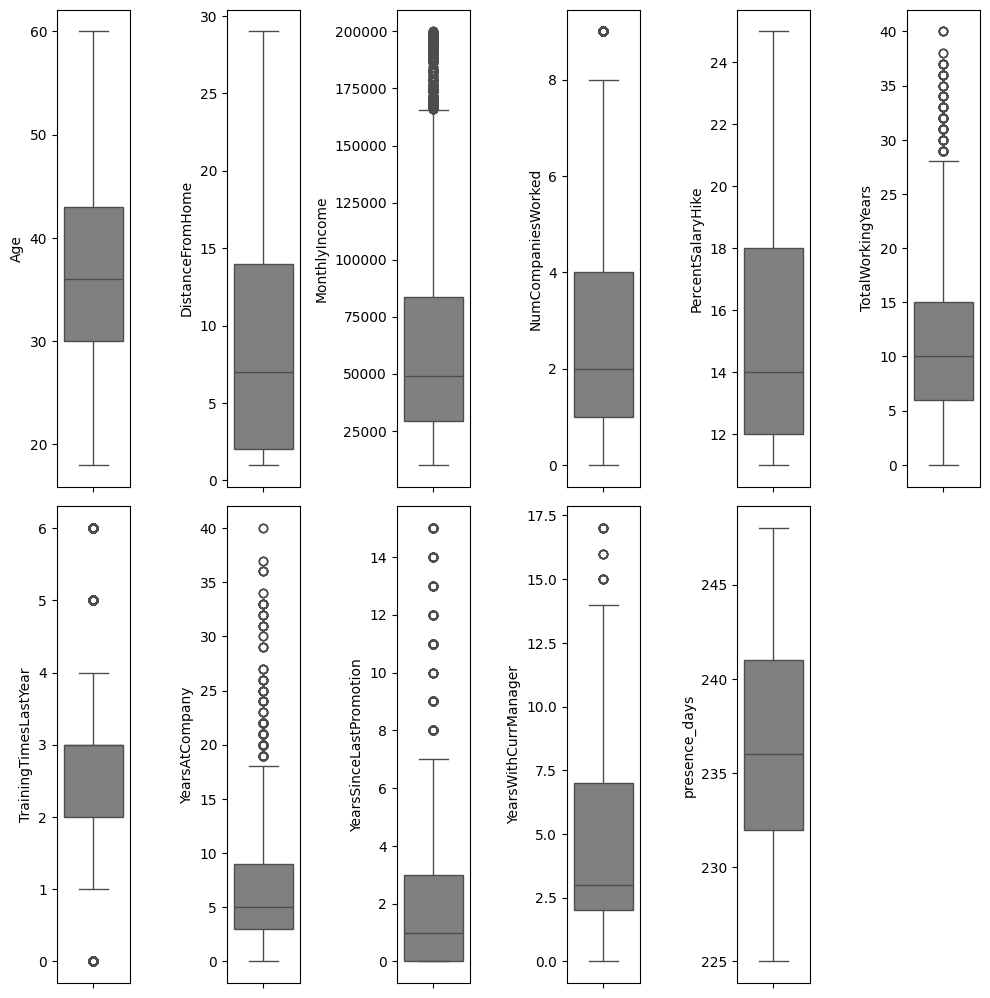

In [ ]:
plt.figure(figsize=(10,15))
for i in range(0, len(nums)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y=df_new[nums[i]], color='gray', orient='v')
    plt.tight_layout()

In [ ]:
def view_outlier(df, col):

    """
    Utility function to clean outlier using Tukey Fences Method.
    :param df: Dataframe with outlier (pd.DataFrame)
    :param col: Numerical Feature (String)
    :return: Dataframe without outlier (pd.DataFrame)
    """

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    up_bound = q3 + 1.5*iqr
    low_bound = q1 - 1.5*iqr

    outlier = df[col][(df[col] < low_bound) | (df[col] > up_bound)]

    #print(f'Percentage of outliers: {len(outlier)*100/len(df[col]):.2f}%')
    print(f'Percentage of outliers: {len(outlier):.2f}')
    print(outlier)

In [ ]:
view_outlier(df_new, col='PercentSalaryHike')
view_outlier(df_new, col='YearsSinceLastPromotion')

Percentage of outliers: 0.00
Series([], Name: PercentSalaryHike, dtype: int64)
Percentage of outliers: 321.00
11      10
13       9
23      11
53       9
55       8
        ..
4362     9
4370    12
4383    11
4389    15
4403    11
Name: YearsSinceLastPromotion, Length: 321, dtype: int64


### Handling Outlier


---
1. Pengecekan pada data yang memiliki outlier, apakah masih termasuk data yang normal atau tidak. Jika masih termasuk data yang normal maka tidak perlu dilakukan handling outlier
2. Perlu perhatian khusus untuk handle kolom monthlyincome, yearsatcompany,


### View Numeric Distribution

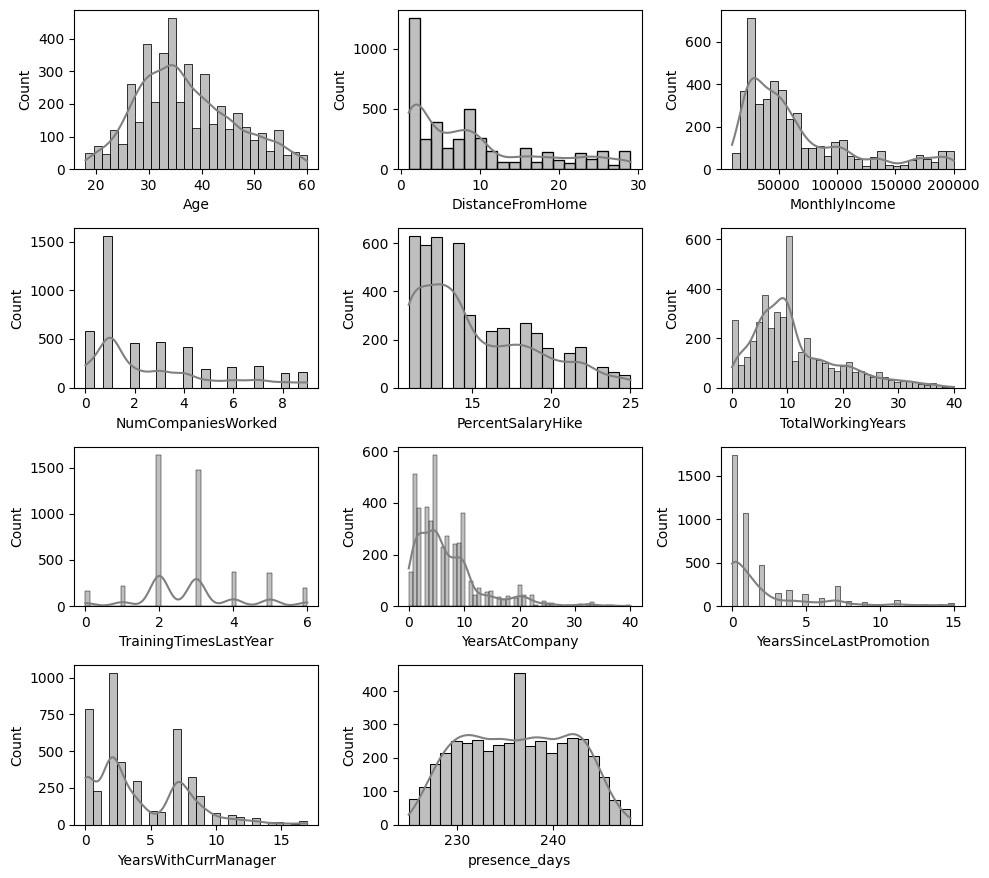

In [ ]:
plt.figure(figsize=(10,15))
for i in range(0, len(nums)):
    plt.subplot(7, 3, i+1)
    sns.histplot(df_new[nums[i]], kde=True, color='gray')
    plt.tight_layout()

## Skewness Handling


---

1. Untuk membuat distribusi menjadi lebih normal.
2. Kolom yang perlu Age, Distance From Home, Total Working Years
3. Mencoba dengan berbagai cara seperti: transformasi, seperti log transformation atau square root transformation

In [ ]:
def find_distribution (data, col):
  mean = data[col].mean()
  median = data[col].median()

  skewness = data[col].skew()
  kurtosis = data[col].kurtosis()

  if (skewness < 0.5) & (skewness > -0.5):
    dist = 'approximately symmatric'
  elif (skewness >= 0.5) and (skewness <= 1):
    dist = 'moderate-right-skewed'
  elif (skewness >= -1) and (skewness <= -0.5):
    dist = 'moderate-left-skewed'
  elif (skewness > 1):
    dist = 'highly-right-skewed'
  elif (skewness < -1):
    dist = 'highly-left-skewed'

  if (kurtosis < 3):
    kurt = 'few outlier'
  elif (kurtosis == 3):
    kurt = 'have outlier same as normal distribution'
  elif (kurtosis > 3):
    kurt = 'many outlier'

  return skewness, dist, kurt

In [ ]:
results = []

for i in range(len(nums)) :
  skewness, dist, kurt = find_distribution(df_new, nums[i])
  results.append([nums[i], skewness, dist, kurt])

results = pd.DataFrame(results, columns=['column', 'skewness', 'distribution', 'kurtosis'])
results

,column,skewness,distribution,kurtosis
0,Age,0.413005,approximately symmatric,few outlier
1,DistanceFromHome,0.957466,moderate-right-skewed,few outlier
2,MonthlyIncome,1.368884,highly-right-skewed,few outlier
3,NumCompaniesWorked,1.031980,highly-right-skewed,few outlier
4,PercentSalaryHike,0.820569,moderate-right-skewed,few outlier
5,TotalWorkingYears,1.118879,highly-right-skewed,few outlier
6,TrainingTimesLastYear,0.552748,moderate-right-skewed,few outlier
7,YearsAtCompany,1.763328,highly-right-skewed,many outlier
8,YearsSinceLastPromotion,1.982939,highly-right-skewed,many outlier
9,YearsWithCurrManager,0.832884,moderate-right-skewed,few outlier


## Categorical Encoding


---
1. Education, Environment Satisfaction, Job Satisfaction, Job Level, Stock Option Level
2. Variabel-variabel ini perlu di-encode
3. Metode: one-hot encoding atau label encoding


## Mulrivariate Analysis

---
1. Feature Dependen yang perlu dilakukan analisys ini, yakni: age, marital status, total working years, years at company, years with current manager, environment satisfaction, & job satisfaction


### Statistic Test

In [ ]:
columns=df_new.columns
columns_except_attrition = columns.drop('Attrition')
print(columns_except_attrition)

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'total_hours_per_year', 'avg_hours_per_day', 'presence_days',
       'Overtime', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')


In [ ]:
from scipy.stats import ttest_ind, chi2_contingency

group_a = df_new[df_new['Attrition'] == 'Yes']
group_b = df_new[df_new['Attrition'] == 'No']

for col in columns_except_attrition:
    if col in nums :
        t_stat, p_value = ttest_ind(group_a[col], group_b[col]) #pakai t test karena hanya ada 1 kategori
        print(f"column: {col}")
        print(f"t-statistic: {t_stat}")
        print(f"p-value: {p_value}")
        if p_value < 0.05:
            print('kesimpulan : ada perbedaan signifikan')
        else :
            print('kesimpulan : tidak ada perbedaan signifikan')
    elif col in cats :
        count_a = group_a[col].value_counts()
        count_b = group_b[col].value_counts()
        chi2_stat, p_value, dof, expected = chi2_contingency([count_a, count_b])
        print(f"column: {col}")
        print(f"chi-squared statistic: {chi2_stat}")
        print(f"p-value: {p_value}")
        if p_value < 0.05:
            print('kesimpulan : ada perbedaan signifikan')
        else :
            print('kesimpulan : tidak ada perbedaan signifikan')
    print('=======================================')

column: Age
t-statistic: -10.70661860061757
p-value: 1.9968016158894556e-26
kesimpulan : ada perbedaan signifikan
column: BusinessTravel
chi-squared statistic: 72.5472410569655
p-value: 1.7642769729832015e-16
kesimpulan : ada perbedaan signifikan
column: Department
chi-squared statistic: 29.090274924488263
p-value: 4.820888218170407e-07
kesimpulan : ada perbedaan signifikan
column: DistanceFromHome
t-statistic: -0.6460416038042738
p-value: 0.518286042805572
kesimpulan : tidak ada perbedaan signifikan
column: Education
chi-squared statistic: 5.641147679249199
p-value: 0.22759826301782393
kesimpulan : tidak ada perbedaan signifikan
column: EducationField
chi-squared statistic: 37.387590124328156
p-value: 5.007939013179554e-07
kesimpulan : ada perbedaan signifikan
column: Gender
chi-squared statistic: 1.349904410246582
p-value: 0.24529482862926827
kesimpulan : tidak ada perbedaan signifikan
column: JobLevel
chi-squared statistic: 3.757594383418145
p-value: 0.43980465059995266
kesimpulan :

### Attrition Vs All

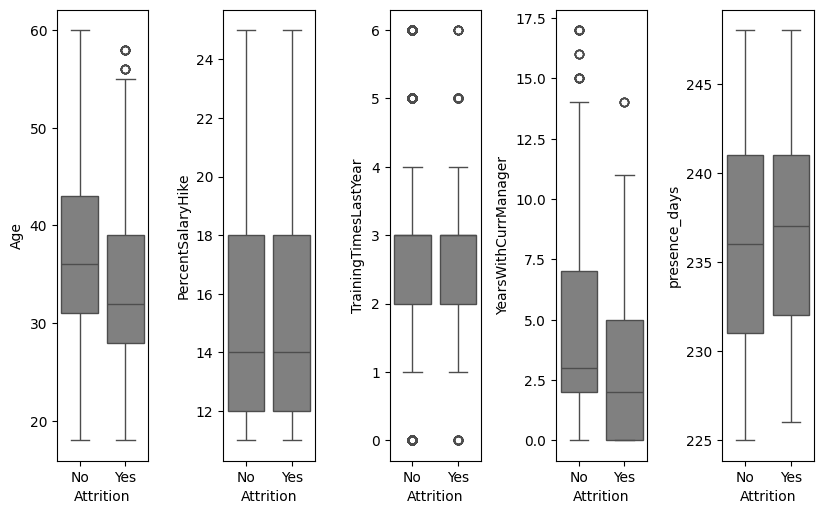

In [ ]:
numsAttrition = ["Age", "PercentSalaryHike", "TrainingTimesLastYear", "YearsWithCurrManager","presence_days"]

plt.figure(figsize=(10,15))
for i in range(0, len(numsAttrition)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(x="Attrition", y=numsAttrition[i], data=df_new, color='gray', orient='v')
    plt.tight_layout()

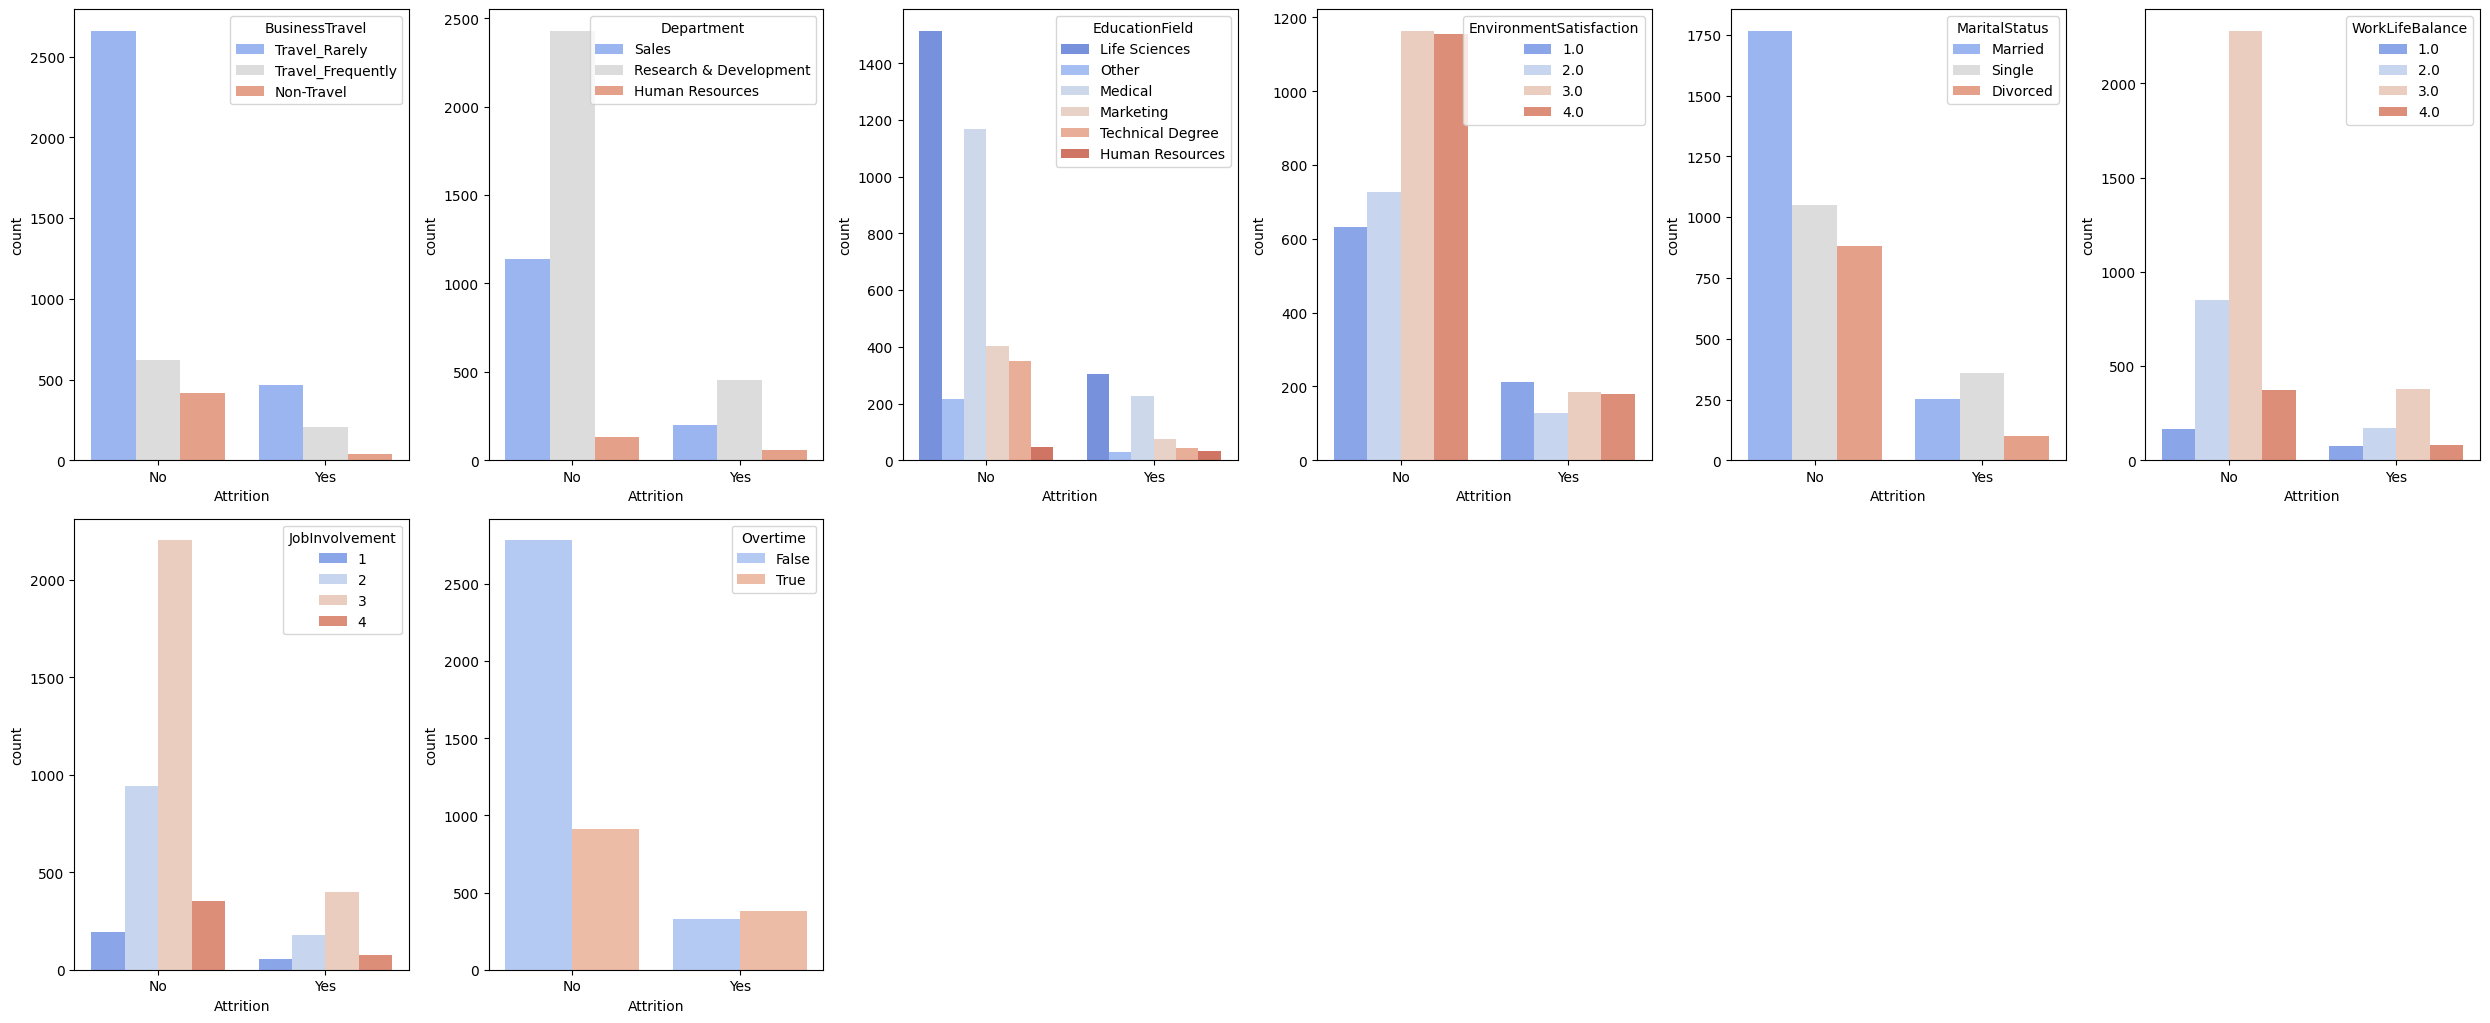

In [ ]:
catsAttrition = ["BusinessTravel", "Department", "EducationField", "EnvironmentSatisfaction", "MaritalStatus", "WorkLifeBalance", "JobInvolvement","Overtime"]

plt.figure(figsize=(25,15))
for i in range(0, len(catsAttrition)):
    plt.subplot(3,6, i+1)
    sns.countplot(x="Attrition", hue=catsAttrition[i], data=df_new, palette='coolwarm', orient='v')
    plt.tight_layout()

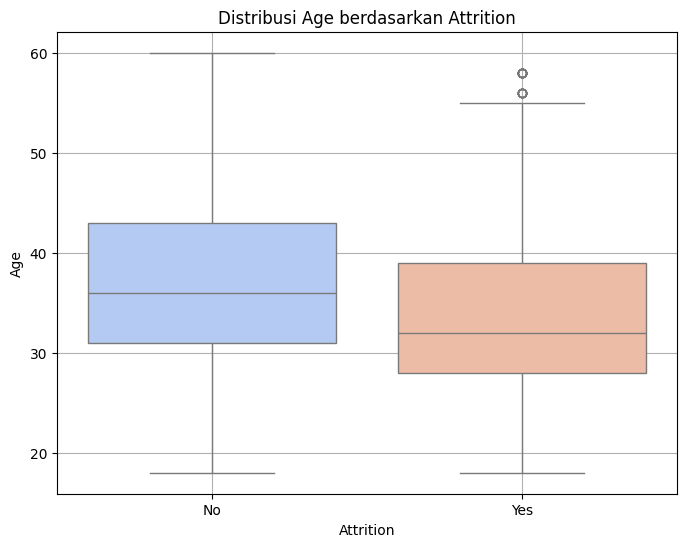

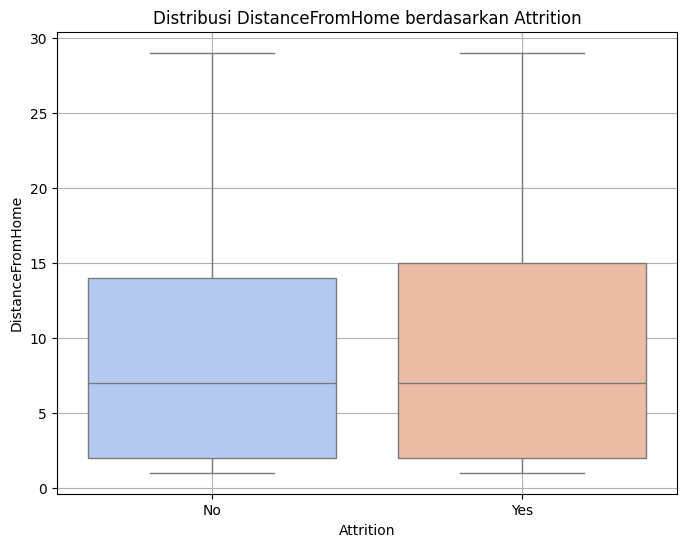

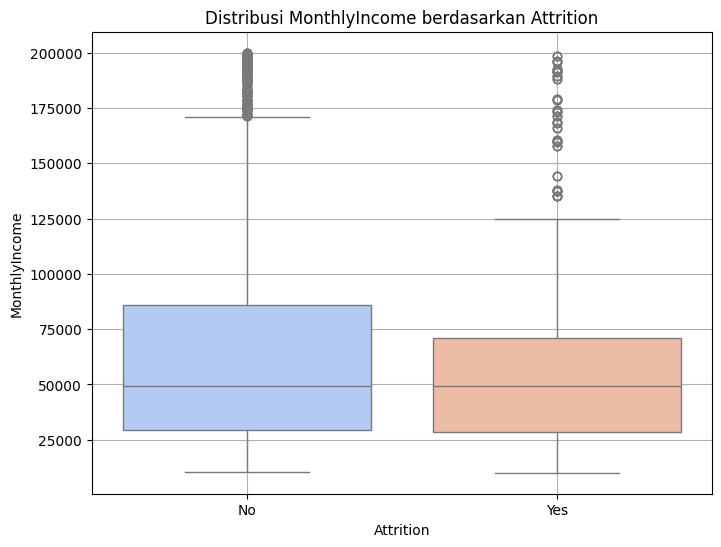

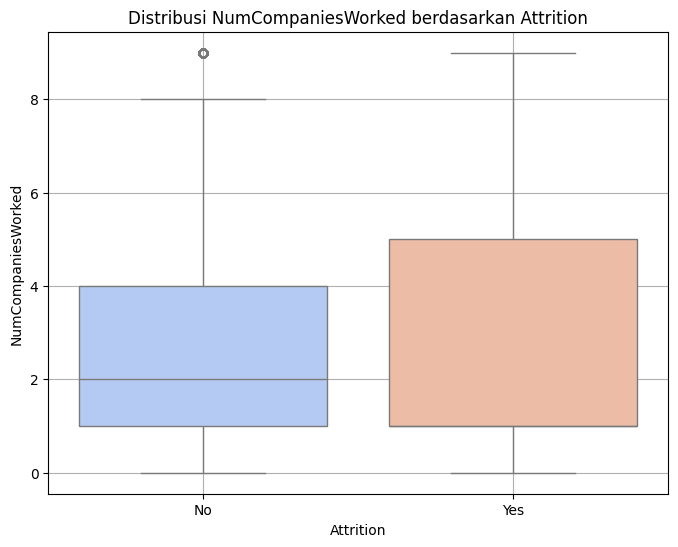

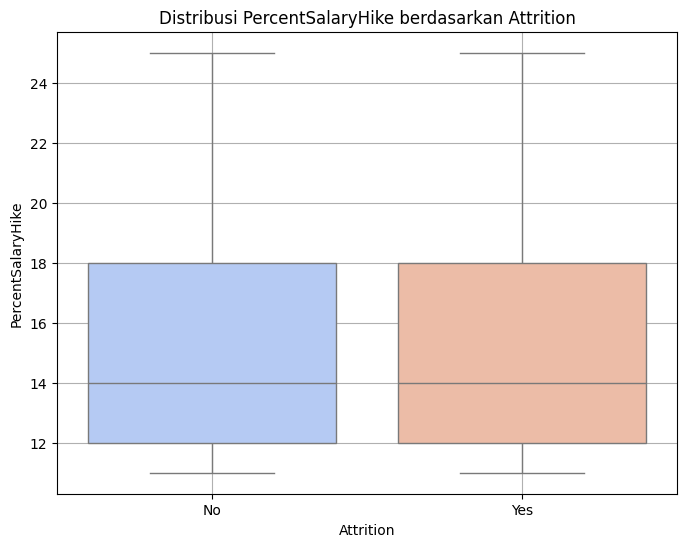

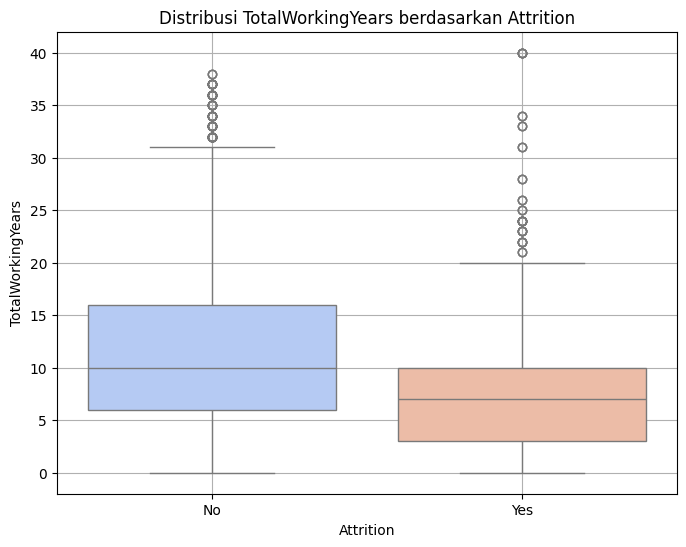

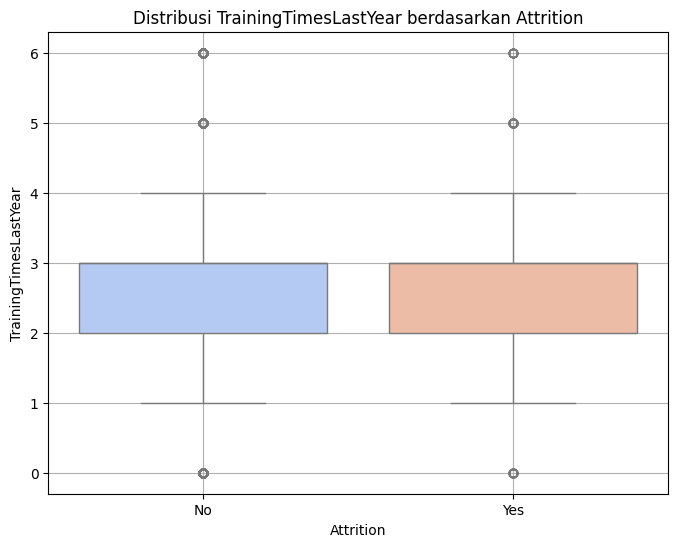

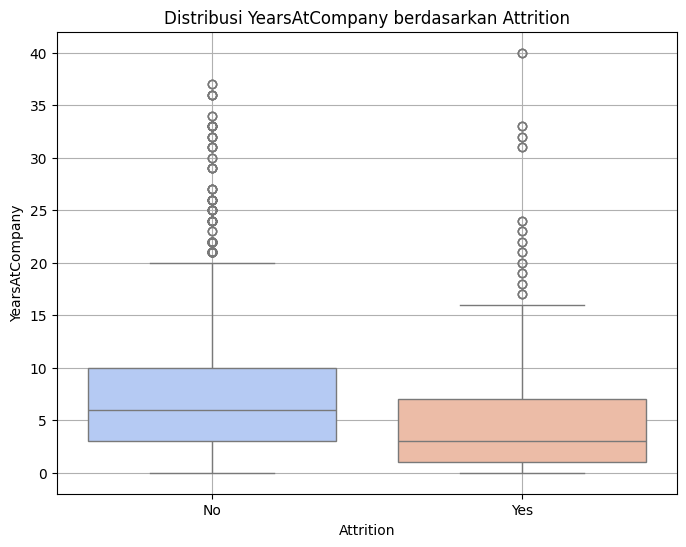

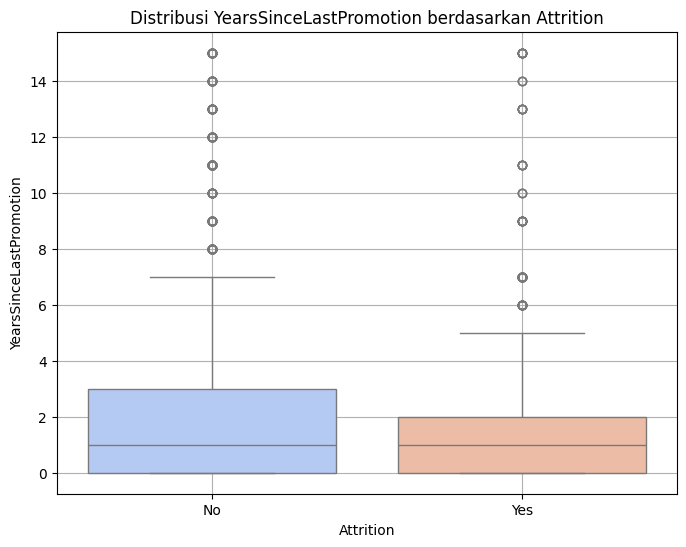

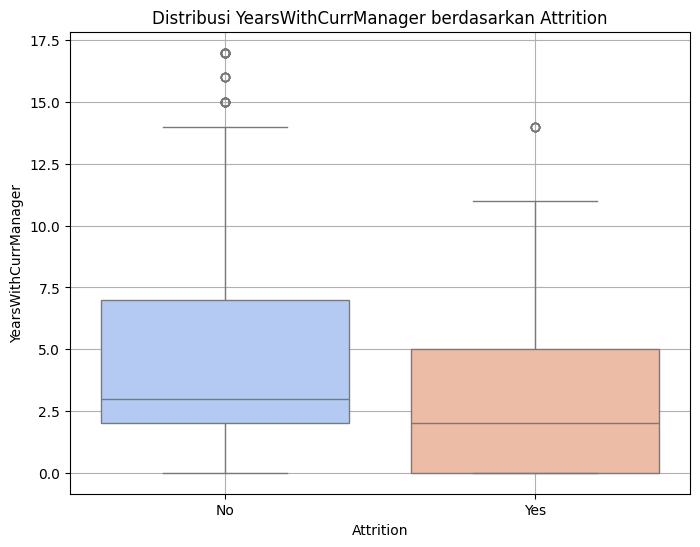

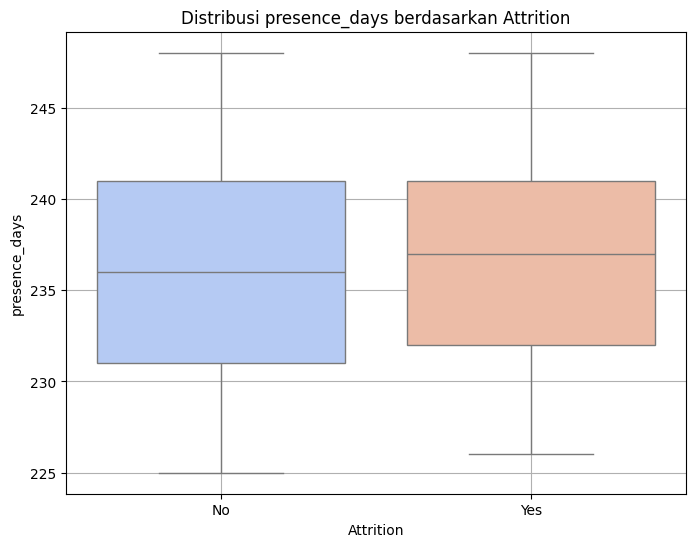

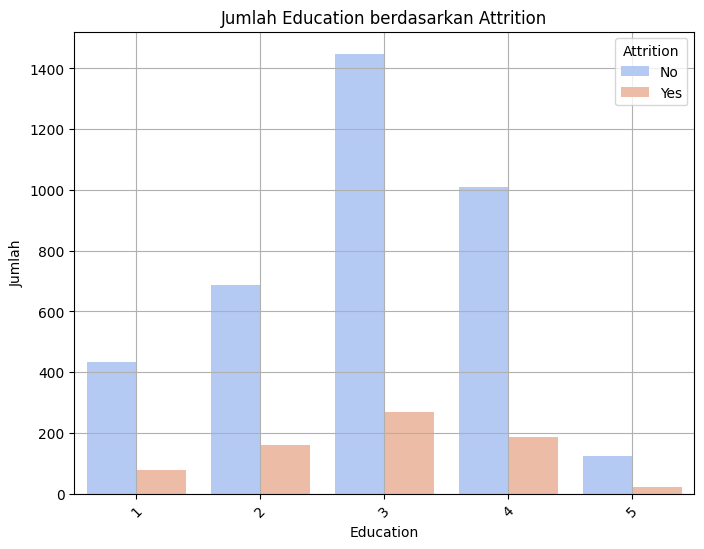

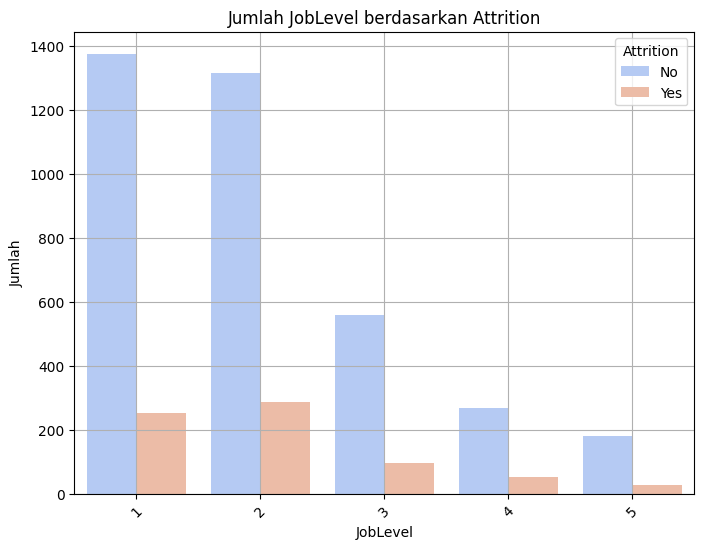

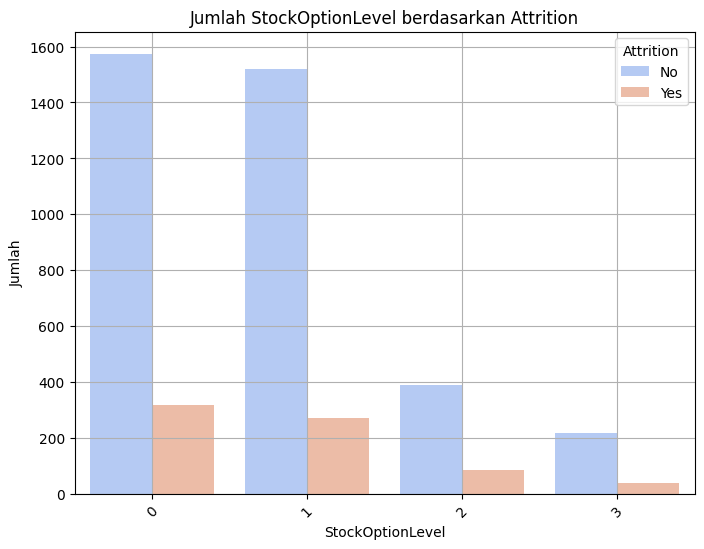

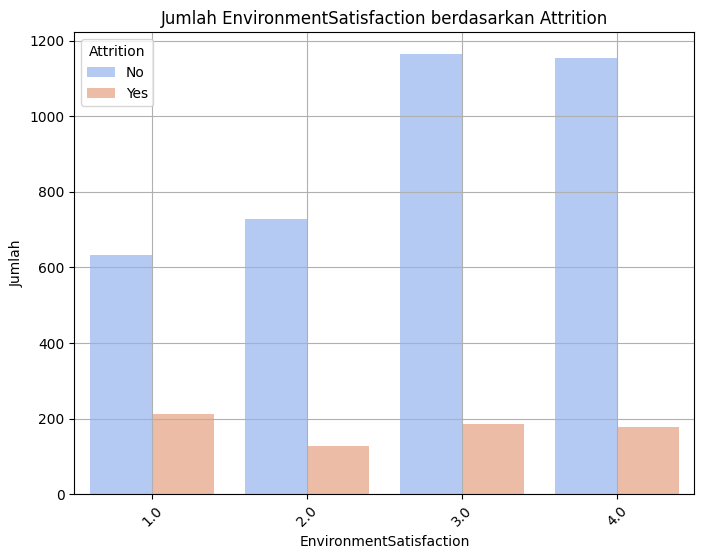

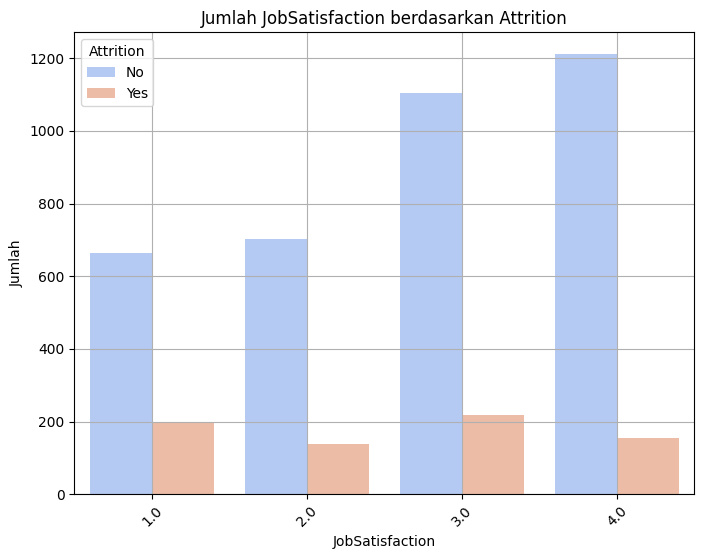

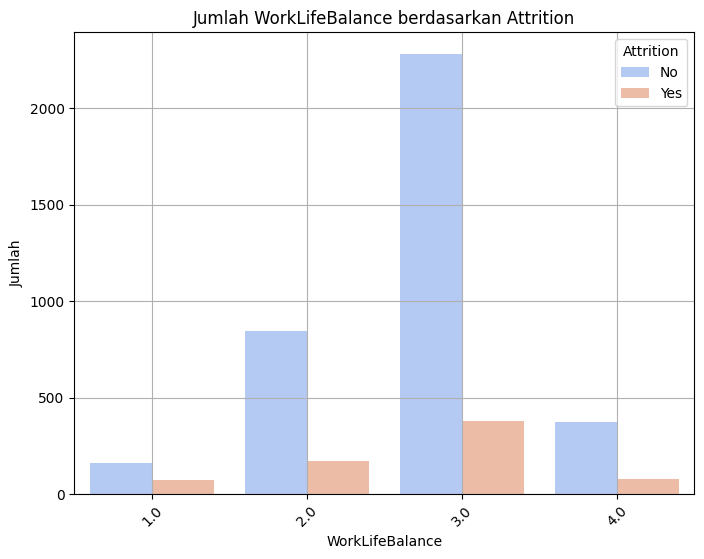

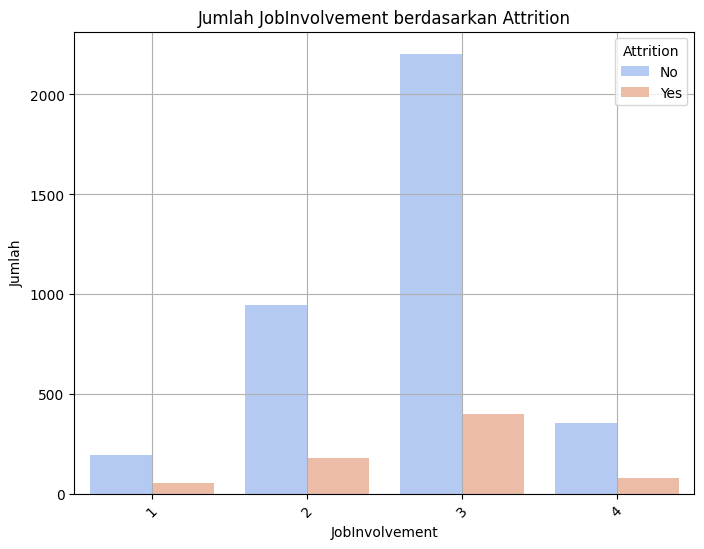

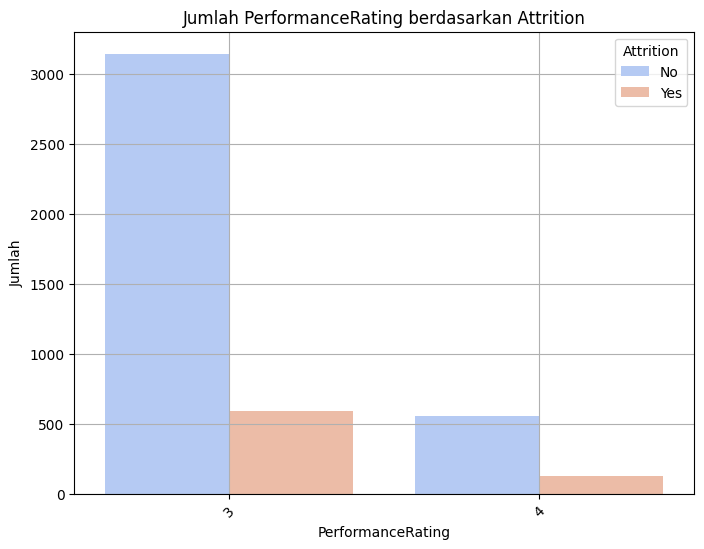

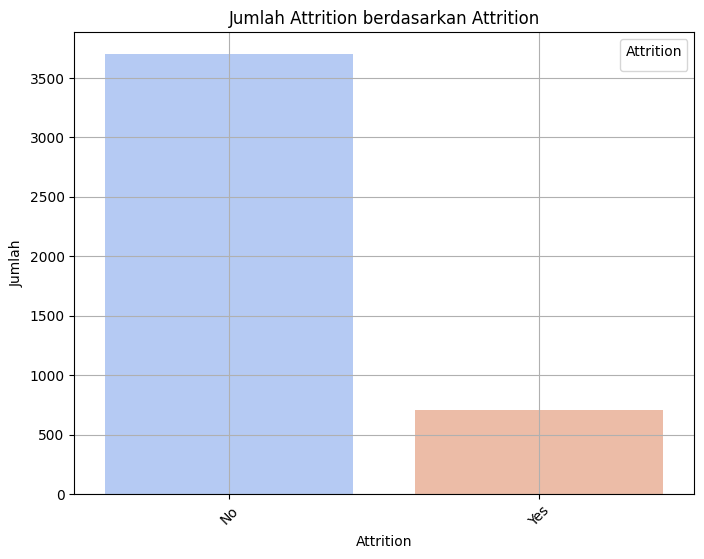

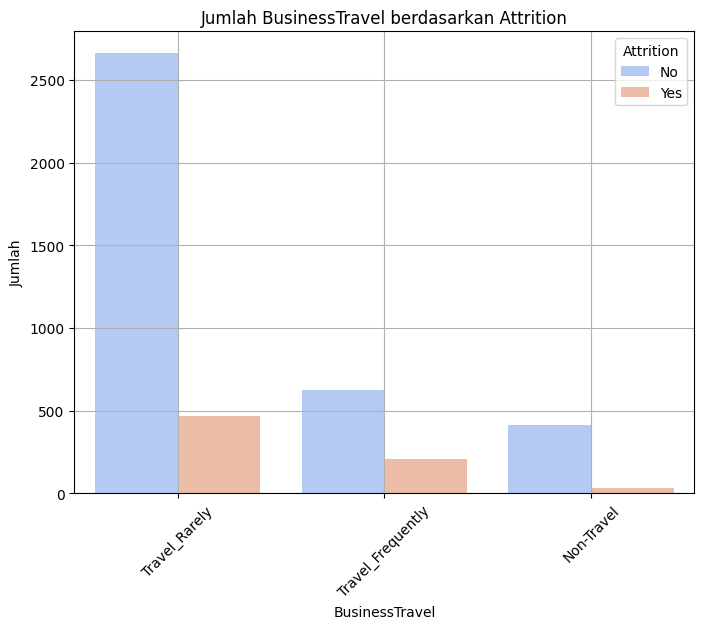

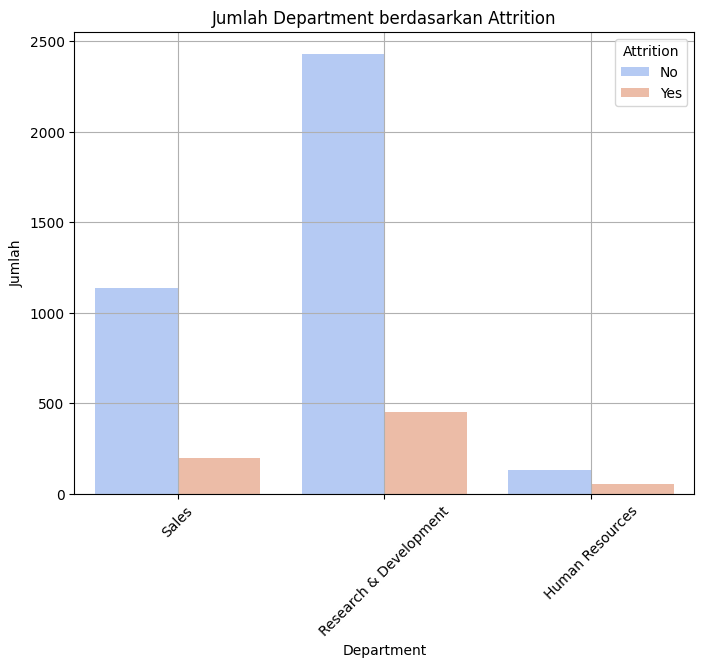

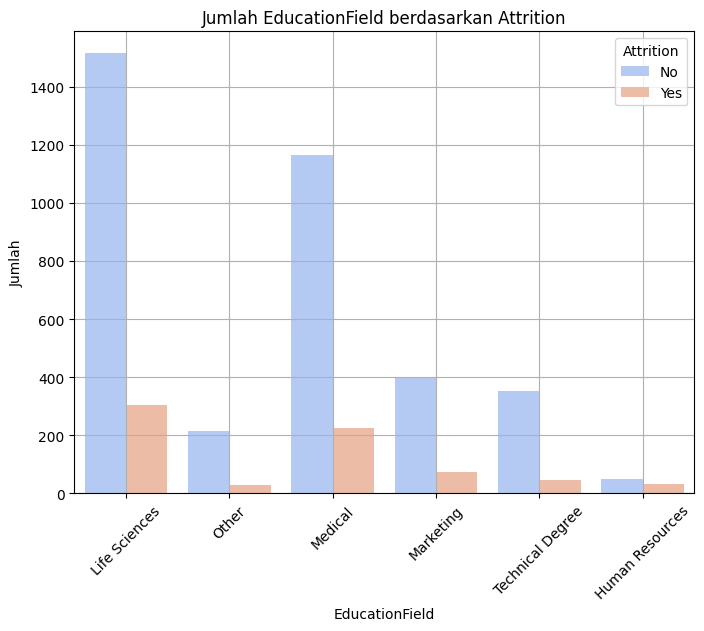

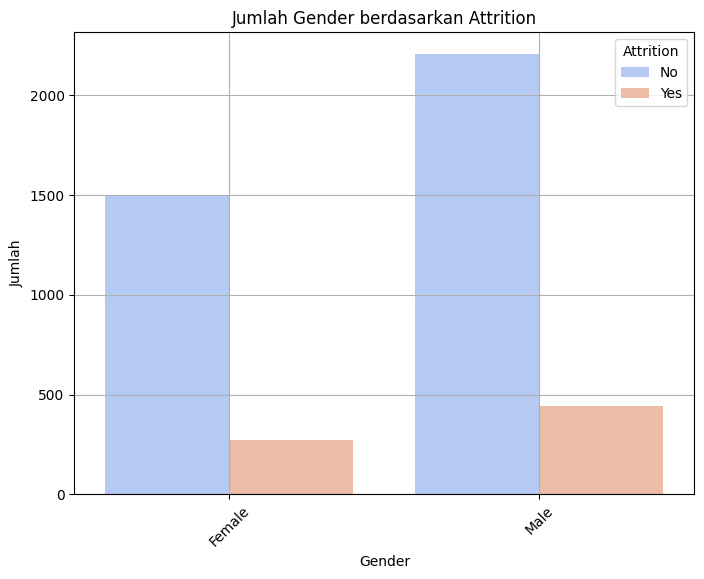

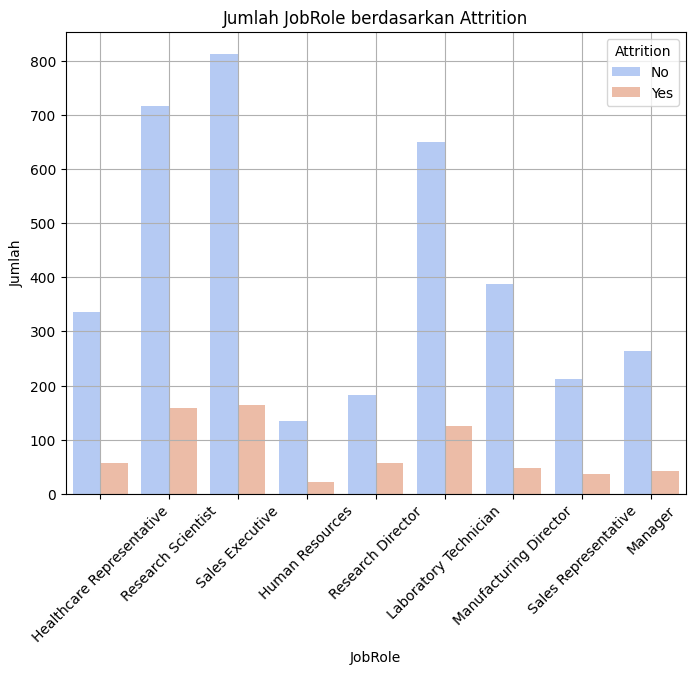

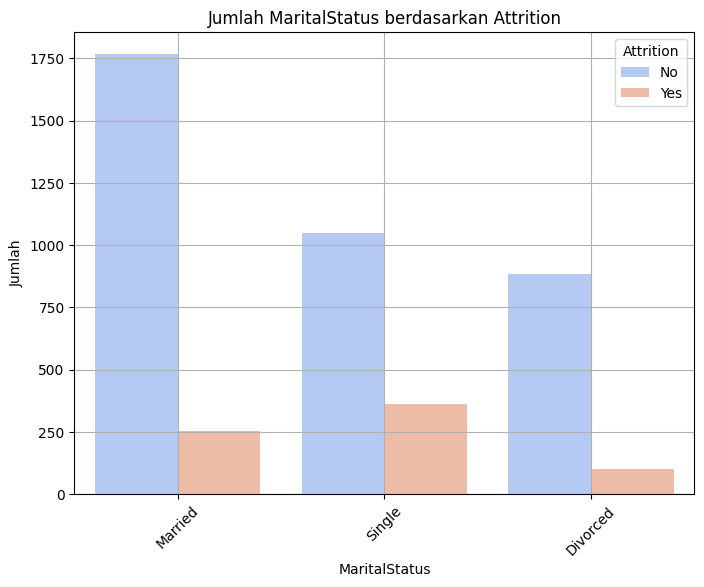

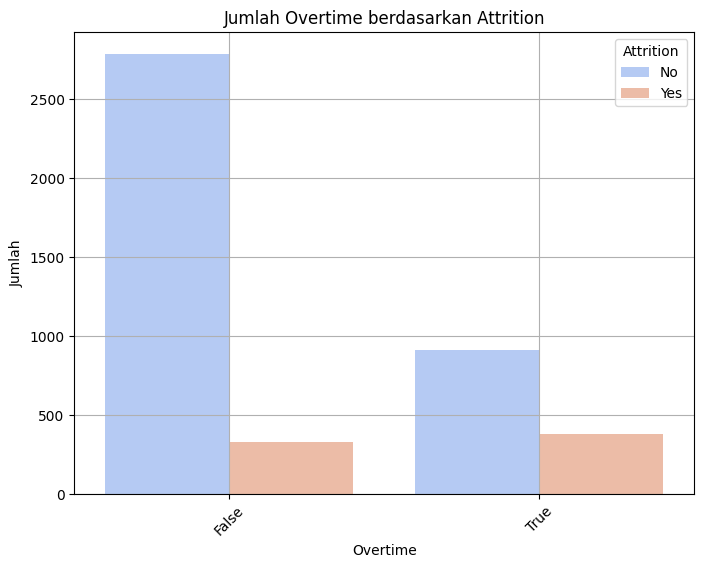

In [ ]:
# Visualisasi Variabel Numerik
for col in nums:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Attrition', y=col, data=df_new, palette='coolwarm')  # Gunakan 'data=df_new'
    plt.title(f'Distribusi {col} berdasarkan Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

# Visualisasi Variabel Kategorikal
for col in cats:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Attrition', data=df_new, palette='coolwarm')  # Gunakan 'data=df_new'
    plt.title(f'Jumlah {col} berdasarkan Attrition')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.legend(title='Attrition')
    plt.grid(True)
    plt.show()


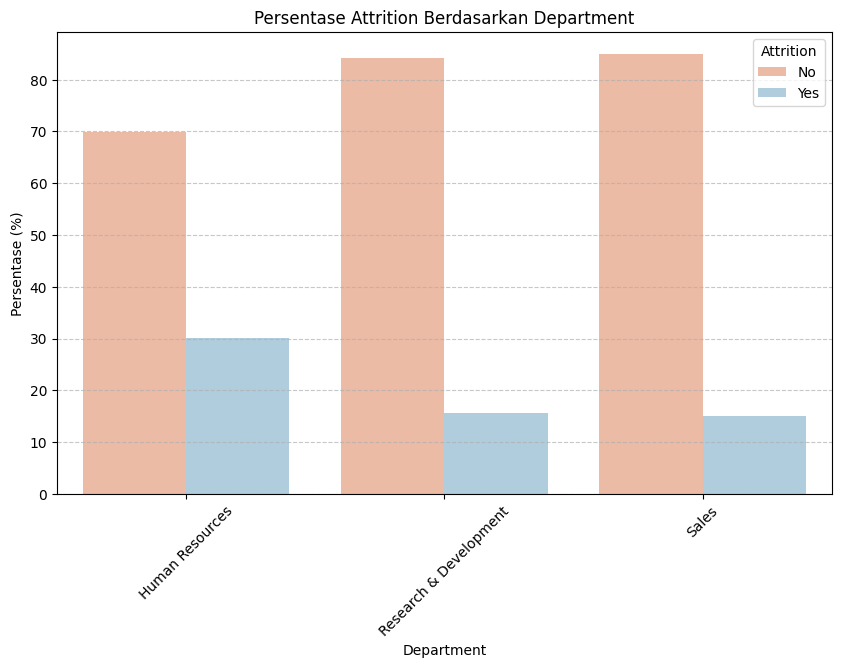

In [ ]:
# Hitung persentase attrition berdasarkan department
department_attrition = (
    merged_df.groupby(['Department', 'Attrition'])
    .size()
    .reset_index(name='Count')
)

# Tambahkan kolom persentase
department_attrition['Percentage'] = (
    department_attrition['Count']
    / department_attrition.groupby('Department')['Count'].transform('sum')
    * 100
)

# Filter hanya kolom yang relevan
department_attrition = department_attrition[['Department', 'Attrition', 'Percentage']]

# Visualisasi persentase dengan barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Department', y='Percentage', hue='Attrition', data=department_attrition, palette='RdBu'
)
plt.title('Persentase Attrition Berdasarkan Department')
plt.ylabel('Persentase (%)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?


feature-feature yang memiliki korelasi dengan attrition, yaitu


---
1. Age
2. BusinessTravel
3. Department
4. EducationField
5. MaritalStatus
6. MonthlyIncome
7. NumCompaniesWorked
8. PercentSalaryHike
9. TotalWorkingYears
10. TrainingTimesLastYear
11. YearsAtCompany
12. YearsSinceLastPromotion
13. YearsWithCurrManager
14. EnvironmentSatisfaction
15. WorkLifeBalance
16. JobInvolvement

### Encode Data

In [ ]:
cats_encode = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Overtime' ]

In [ ]:
# Dictionary untuk menyimpan mapping hasil factorize
factorize_mappings = {}

# Loop untuk encoding setiap kolom
for col in cats_encode:
    df_new[col], unique_labels = pd.factorize(df_new[col])
    factorize_mappings[col] = {label: idx for idx, label in enumerate(unique_labels)}

# Menampilkan mapping hasil factorize
print("\nMapping hasil factorize:")
for col, mapping in factorize_mappings.items():
    print(f"{col}: {mapping}")


Mapping hasil factorize:
Attrition: {'No': 0, 'Yes': 1}
BusinessTravel: {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}
Department: {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}
EducationField: {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}
Gender: {'Female': 0, 'Male': 1}
JobRole: {'Healthcare Representative': 0, 'Research Scientist': 1, 'Sales Executive': 2, 'Human Resources': 3, 'Research Director': 4, 'Laboratory Technician': 5, 'Manufacturing Director': 6, 'Sales Representative': 7, 'Manager': 8}
MaritalStatus: {'Married': 0, 'Single': 1, 'Divorced': 2}
Overtime: {False: 0, True: 1}


In [ ]:
mapping_added = {'Education' : {1 : 'Below College', 2 : 'College', 3 : 'Bachelor', 4: 'Master', 5 : 'Doctor'},
                 'EnvironmentSatisfaction' : {1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High'},
                 'JobInvolvement' : {1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High'},
                 'JobSatisfaction' : {1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High'},
                 'PerformanceRating' : {1 : 'Low', 2 : 'Good', 3 : 'Excellent', 4 : 'Outstanding'},
                 'WorkLifeBalance' : {1 : 'Bad', 2 : 'Good', 3 : 'Better', 4 : 'Best'}
                 }

factorize_mappings.update(mapping_added)

### Heatmap

<Axes: >

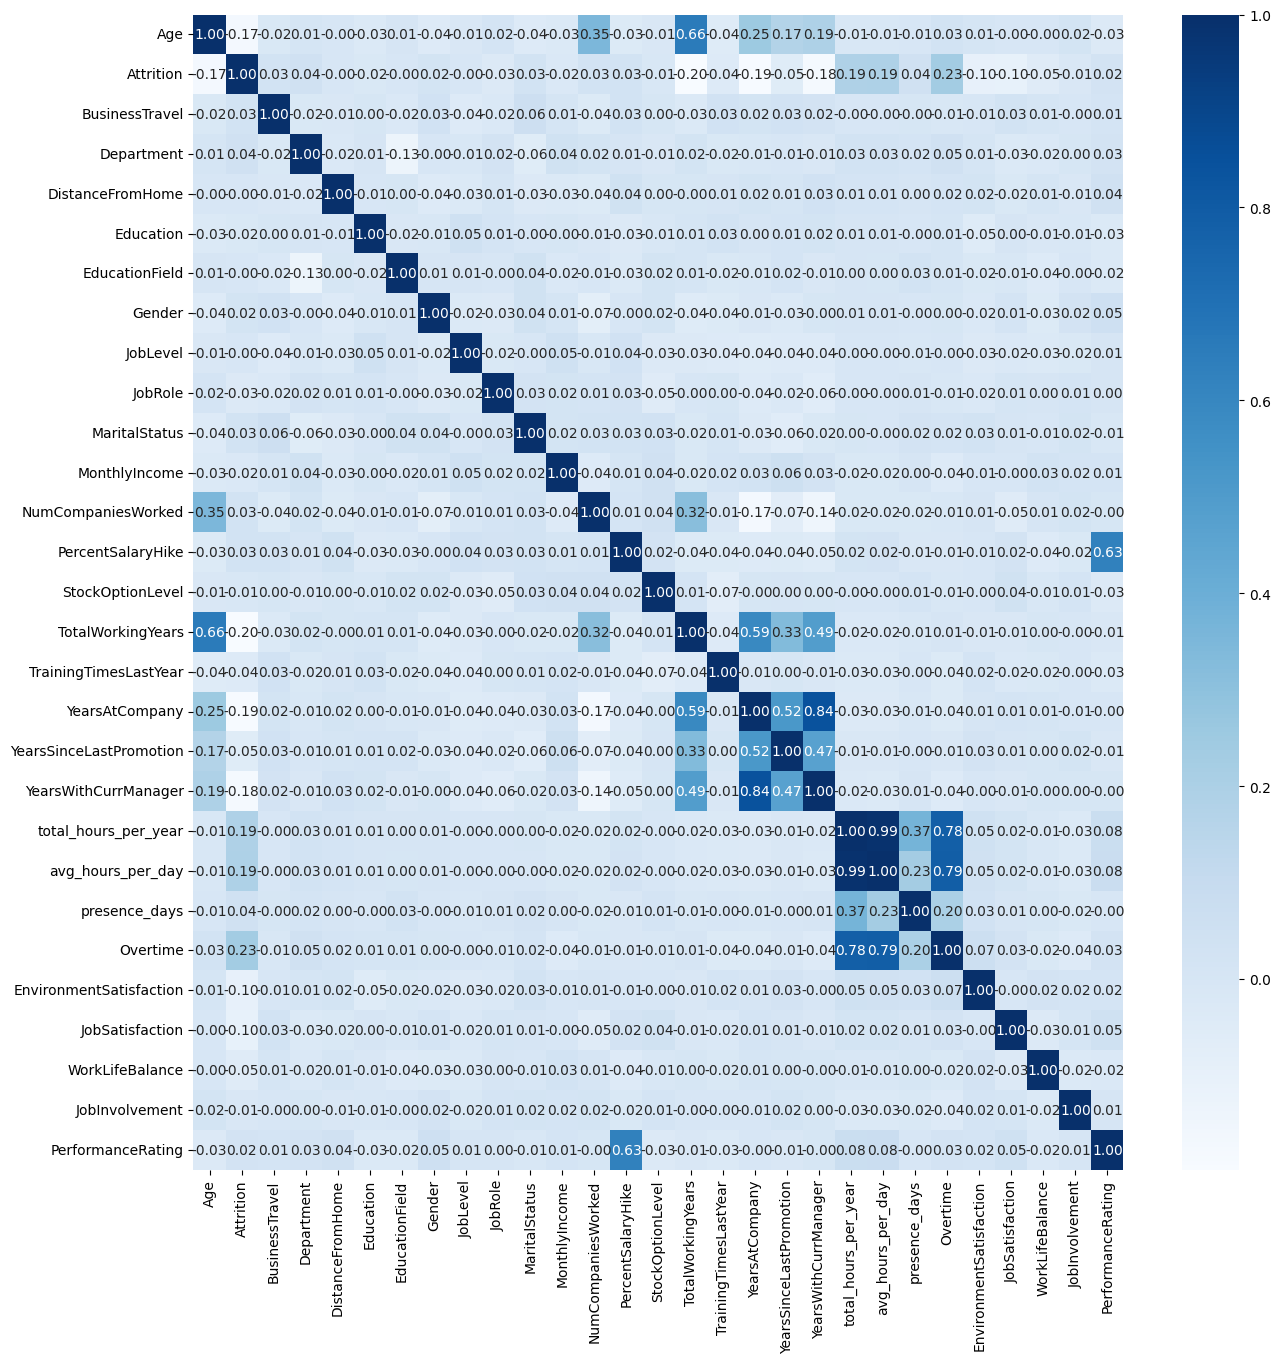

In [ ]:
plt.figure(figsize=(15, 15))
spearman_corr = sns.heatmap(df_new.corr('spearman'), cmap='Blues', annot=True, fmt='.2f')
spearman_corr

In [ ]:
spearman_corr = df_new.corr('spearman')

# Menyaring pasangan fitur dengan korelasi tinggi
threshold = 0.5  # Atur threshold
high_corr_pairs = []

for i in range(len(spearman_corr.columns)):
    for j in range(i + 1, len(spearman_corr.columns)):
        if abs(spearman_corr.iloc[i, j]) > threshold:
            pair = (spearman_corr.columns[i], spearman_corr.columns[j], spearman_corr.iloc[i, j])
            high_corr_pairs.append(pair)

# Menampilkan pasangan fitur dengan korelasi tinggi
print("Pasangan fitur dengan korelasi tinggi (Spearman):")
for pair in high_corr_pairs:
    print(f"{pair[0]} dan {pair[1]}: {pair[2]:.2f}")


Pasangan fitur dengan korelasi tinggi (Spearman):
Age dan TotalWorkingYears: 0.66
PercentSalaryHike dan PerformanceRating: 0.63
TotalWorkingYears dan YearsAtCompany: 0.59
YearsAtCompany dan YearsSinceLastPromotion: 0.52
YearsAtCompany dan YearsWithCurrManager: 0.84
total_hours_per_year dan avg_hours_per_day: 0.99
total_hours_per_year dan Overtime: 0.78
avg_hours_per_day dan Overtime: 0.79


#Feature Enginering

In [ ]:
df_new.to_csv("data_final.csv", index=False)

In [ ]:
from google.colab import files
files.download('data_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>